# **HOT SUMMER ???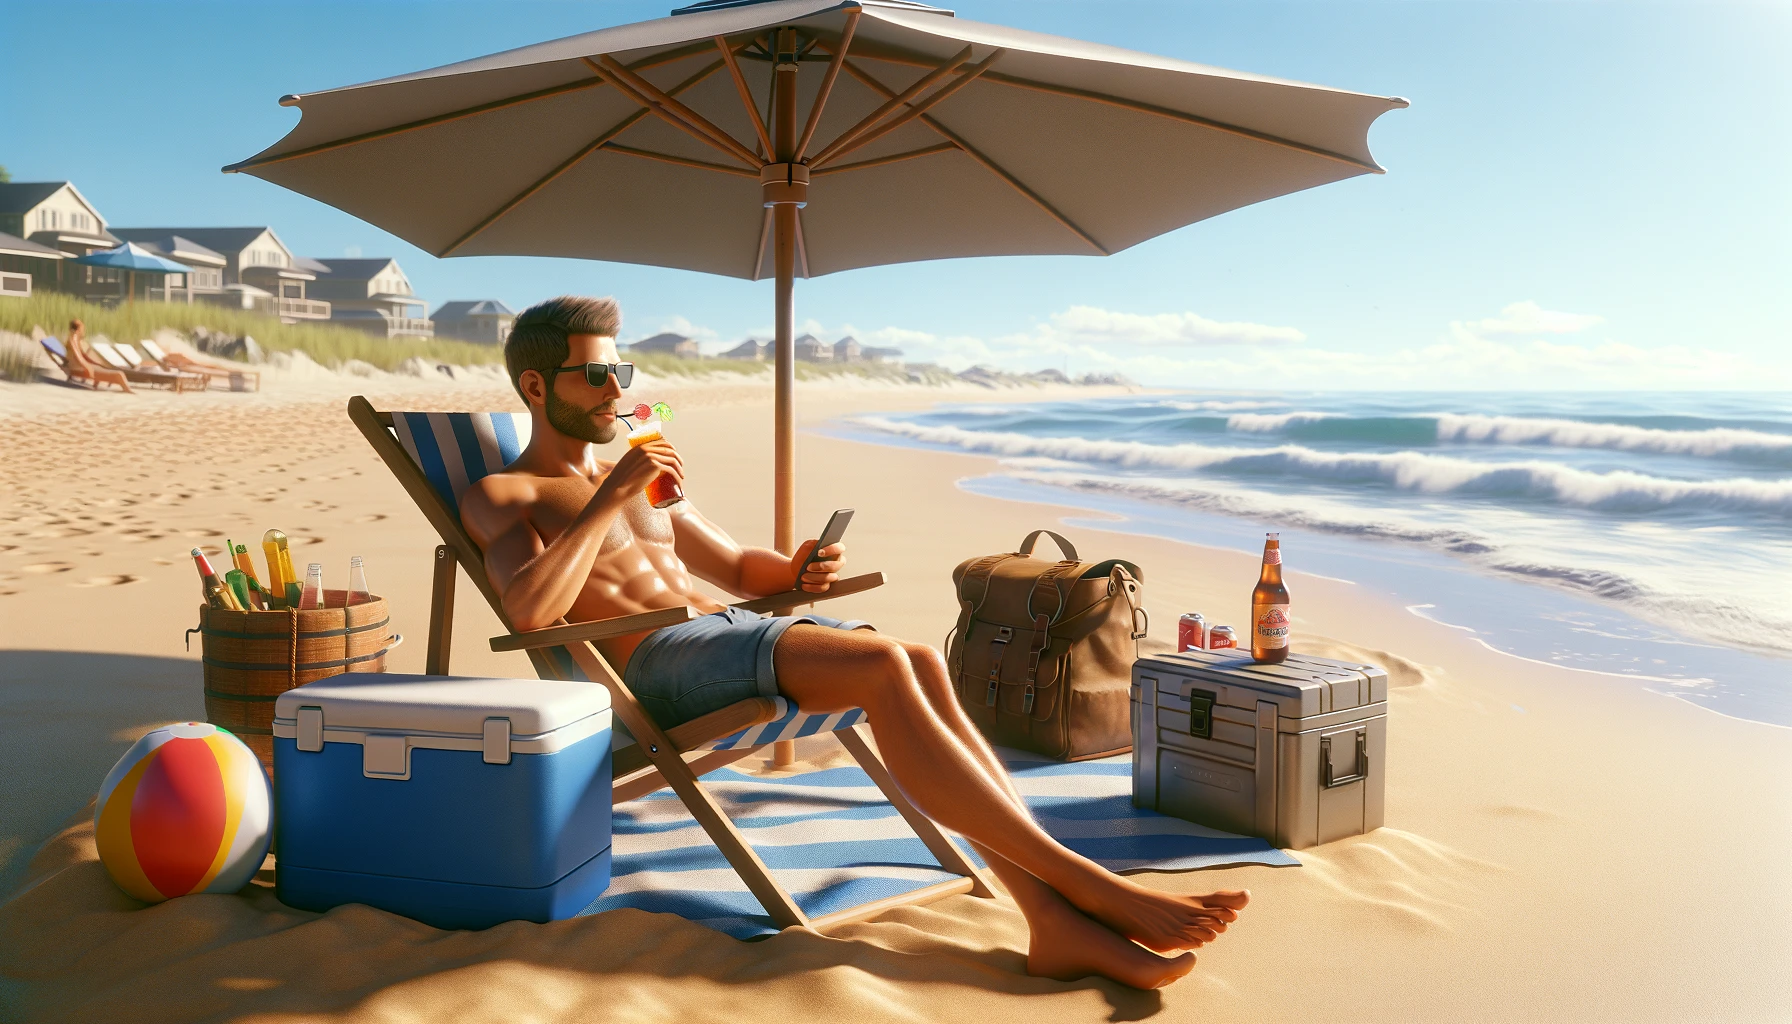**

# ***GET CHILLED WITH OUR PROJECT ON SUMMER WEATHER STATION RECORDED DATA AND WATER QUALITY RECORDED DATA BY VARIOUS SENSORS AT CHICAGO BEACH***



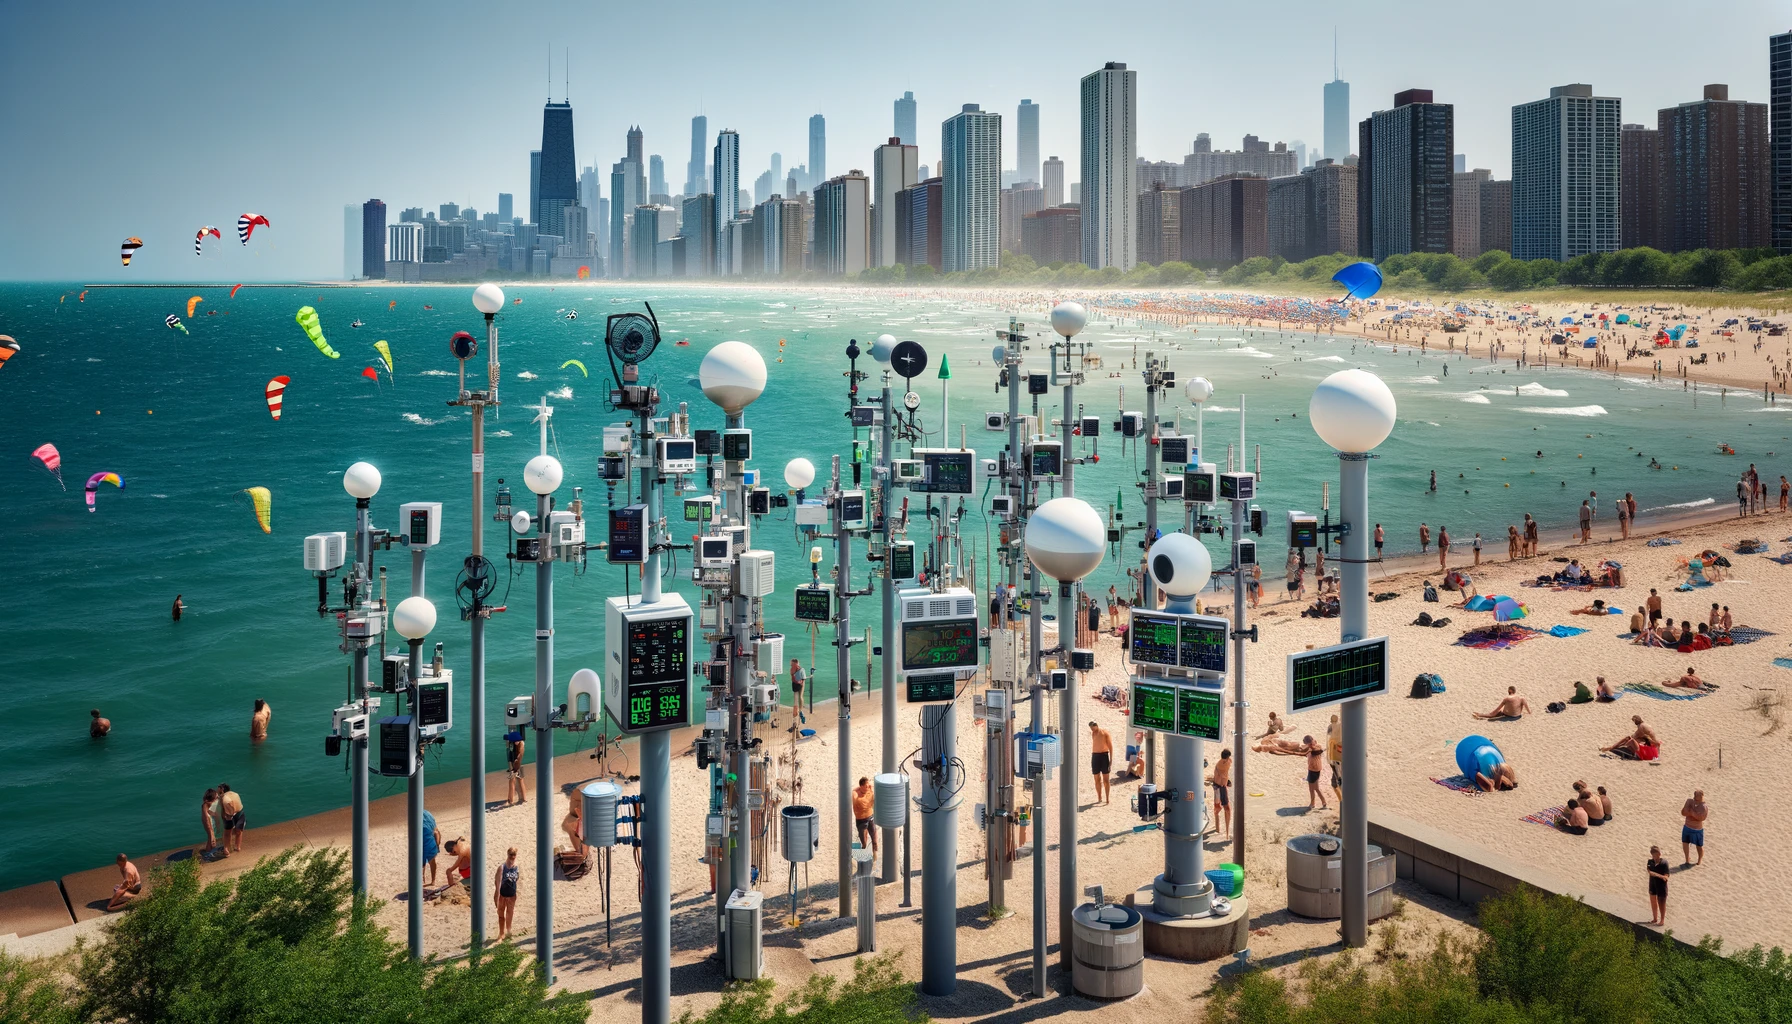

## **TITLE: Analysis of Beach Water Quality and Weather pattern from IoT sensors**


**Group members:** Akhil Kanukula, Akhil Mittapalli, Soubhagya Panda.

Introduction: Our objective in the Final Project is to demonstrate proficiency in utilizing data analysis techniques, this project requires formulating hypotheses that dive deeper into every detail of data. The chosen datasets, in this case, are the weather and water quality of Chicago beach recorded through IoT sensors, which inherently shapes the scope of project requirements.

**Data Source:**

When we were exploring the real time data sets on IoT, we found the datasets on water quality and weather pattern of chicago beach. We used the search term “ IoT datasets" in https://data.gov/ and found these sets of data. We are choosing these datasets for formulation and proving a few hypotheses.

**Dataset links:**

https://catalog.data.gov/dataset/beach-weather-stations-automated-sensors

https://catalog.data.gov/dataset/beach-water-quality-automated-sensors

https://data.cityofchicago.org/Parks-Recreation/Beach-Water-and-Weather-Sensor-Locations/g3ip-u8rb/about_data

**Basic information about the data:**

The Chicago Park District maintains weather sensors both on land and in the water at beaches along Lake Michigan's lakefront. These sensors record measurements hourly during summer months when operational, with data availability varying during other seasons. One dataset provides measurements on lake water, while another dataset offers land-based weather measurements at selected beaches. These two datasets are related to each other with a third dataset which has common attributes. The third dataset has the location details of all the weather and water sensors. Links to all the datasets are provided above.

**Citations:** https://data.cityofchicago.org/Parks-Recreation/Beach-Water-and-Weather-Sensor-Locations/g3ip-u8rb/about_data

This dataset does not have any license as it is supposed for public use and research and it is a free source to download. This data is legal to access as it is posted in public datasets sources for research and practice. The data which is being used will not be violating terms of service.

**About datasets:**

Beach Water Quality Dataset 1: This dataset provides detailed information of beach water quality. It consists of 42.6k rows, 10 columns of data. The size of the csv dataset is 4.5 MB.

**Components/Attributes in the dataset 1:**

Beach Name, Measurement Timestamp, Water Temperature, Turbidity, Transducer Depth, Wave Height, Wave Period, Battery Life, Measurement, Timestamp Label, Measurement ID

Beach Weather Stations Dataset 2: This dataset provides detailed information of beach weather stations. It consists of 171k rows, 18 columns of data. The size of the csv dataset is 25.5 MB

**Components/Attributes in the dataset 2:**

Station Nam, Measurement Timestamp, Air Temperature, Wet Bulb Temperature, Humidity, Rain Intensity, Interval Rain, Total Rain, Precipitation Type, Wind Direction, Wind Speed, Maximum Wind Speed, Barometric Pressure, Solar Radiation, Heading, Battery Life, Measurement Timestamp Label, Measurement ID

Beach Water and weather sensor locations Dataset 3: This dataset contains location details which is common in both weather and water quality datasets. It consists of 9 rows and 5 columns of data. The size of the csv dataset is 860 B.

**Components/Attributes in the dataset 3:**

Sensor Name, Sensor Type, Latitude, Longitude, Location.



As part of the project, We are planning to work on the below hypotheses.

**Hypothesis 1:** Montrose beach is the best beach to spend time with good weather and water conditions

**Hypothesis 2:** There is a significant impact of air temperature, humidity, and wind speed on water conditions (water temperature, turbidity, and wave height).

**Hypothesis 3:** Temporal patterns in water conditions (wave height and period) are significantly affected by seasonal changes in weather patterns, particularly wind direction and speed.

In [1]:
# Importing required modules
!pip install windrose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import calendar
from windrose import WindroseAxes
from geopy.distance import geodesic
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import statsmodels.api as sm
import requests
from io import StringIO

In [2]:
# URLs for the datasets
water_quality_url = 'https://data.cityofchicago.org/api/views/qmqz-2xku/rows.csv?accessType=DOWNLOAD'
weather_url = 'https://data.cityofchicago.org/api/views/k7hf-8y75/rows.csv?accessType=DOWNLOAD'
locations_url = 'https://data.cityofchicago.org/api/views/g3ip-u8rb/rows.csv?accessType=DOWNLOAD'

In [3]:
# Function to load datasets from URLs with error handling scenarios
def load_datasets():
    try:
        water_quality = pd.read_csv(water_quality_url)
        weather = pd.read_csv(weather_url)
        locations = pd.read_csv(locations_url)
        return water_quality, weather, locations
    except requests.exceptions.RequestException as e:
        print(f"Error: Failed to fetch the dataset from the URL. Details: {e}")
    except pd.errors.ParserError:
        print("Error: There was an issue parsing the CSV file. Please ensure it is formatted correctly.")
    except FileNotFoundError:
        print("Error: The specified file path does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

water_quality, weather, locations = load_datasets()

In [4]:
#print first few columns of water_quality data
water_quality.head()

Beach Name   Measurement Timestamp  Water Temperature  Turbidity  \
0      Calumet Beach  04/07/2018 12:30:00 AM               21.7       3.15   
1  Ohio Street Beach  06/14/2019 07:00:00 PM               16.0       2.18   
2  Ohio Street Beach  05/16/2018 01:00:00 PM               21.7       1.92   
3  Ohio Street Beach  05/16/2018 02:00:00 PM               21.9       1.81   
4  Ohio Street Beach  06/04/2018 09:00:00 AM               23.0       0.03   

   Transducer Depth  Wave Height  Wave Period  Battery Life  \
0               NaN        0.389          3.0           0.0   
1               NaN        0.137          3.0          11.8   
2               NaN        0.023          1.0          10.3   
3               NaN        0.026          6.0          10.3   
4               NaN        0.021          8.0          12.4   

  Measurement Timestamp Label               Measurement ID  
0         04/07/2018 12:30 AM     CalumetBeach201804072430  
1          06/14/2019 7:00 PM  OhioStreetBeach201906141900  
2          05/16/2018 1:00 PM  OhioStreetBeach201805161300  
3          05/16/2018 2:00 PM  OhioStreetBeach201805161400  
4          06/04/2018 9:00 AM  OhioStreetBeach201806040900

In [5]:
#print first few columns of weather data
weather.head()

Station Name   Measurement Timestamp  Air Temperature  \
0  63rd Street Weather Station  09/27/2018 10:00:00 AM            16.40   
1  63rd Street Weather Station  09/27/2018 11:00:00 AM            17.10   
2  63rd Street Weather Station  09/27/2018 01:00:00 PM            18.20   
3       Foster Weather Station  09/27/2018 01:00:00 PM            17.89   
4  63rd Street Weather Station  09/27/2018 03:00:00 PM            19.50   

   Wet Bulb Temperature  Humidity  Rain Intensity  Interval Rain  Total Rain  \
0                  12.2        61             0.0            0.0       260.3   
1                  11.5        51             0.0            0.0       260.3   
2                  12.4        51             0.0            0.0       260.3   
3                   NaN        39             NaN            0.0         NaN   
4                  13.0        47             0.0            0.0       260.3   

   Precipitation Type  Wind Direction  Wind Speed  Maximum Wind Speed  \
0                 0.0             231         2.5                 4.7   
1                 0.0             244         3.6                 5.7   
2                 0.0             248         3.1                 5.3   
3                 NaN             249         1.4                 2.3   
4                 0.0             249         3.1                 5.7   

   Barometric Pressure  Solar Radiation  Heading  Battery Life  \
0                996.3              484    356.0          11.9   
1                995.4              468    356.0          11.9   
2                994.8              377    355.0          11.9   
3                993.6                0      NaN          15.1   
4                992.9              461    355.0          11.9   

  Measurement Timestamp Label                        Measurement ID  
0         09/27/2018 10:00 AM  63rdStreetWeatherStation201809271000  
1         09/27/2018 11:00 AM  63rdStreetWeatherStation201809271100  
2          09/27/2018 1:00 PM  63rdStreetWeatherStation201809271300  
3          09/27/2018 1:00 PM      FosterWeatherStation201809271300  
4          09/27/2018 3:00 PM  63rdStreetWeatherStation201809271500

In [6]:
#print first few columns of weather stations and sensors locations data
locations.head()

Sensor Name Sensor Type   Latitude  Longitude  \
0                Calumet Beach       Water  41.714739 -87.527356   
1  63rd Street Weather Station     Weather  41.780992 -87.572619   
2            63rd Street Beach       Water  41.784561 -87.571453   
3   Oak Street Weather Station     Weather  41.901997 -87.622817   
4       Foster Weather Station     Weather  41.976464 -87.647525   

                  Location  
0  (41.714739, -87.527356)  
1  (41.780992, -87.572619)  
2  (41.784561, -87.571453)  
3  (41.901997, -87.622817)  
4  (41.976464, -87.647525)

From the above dataframe informations we see, We have a lot columns with space added in between the names, So to make it easy for future usage we are replacing the spaces by _

In [7]:
# Renaming columns to remove spaces
water_quality.columns = [c.replace(' ', '_') for c in water_quality.columns]
weather.columns = [c.replace(' ', '_') for c in weather.columns]
locations.columns = [c.replace(' ', '_') for c in locations.columns]

**EDA FOR LOCATIONS DATA**

In [8]:
#Performing EDA on weather stations and sensors locations file Data
print("Number of rows in location dataset: ", len(locations))
print("Number of columns in location dataset: ", len(locations.columns))

Number of rows in location dataset:  9
Number of columns in location dataset:  5


In [9]:
# Check for missing values in the data
print(locations.isnull().sum())


Sensor_Name    0
Sensor_Type    0
Latitude       0
Longitude      0
Location       0
dtype: int64


In [10]:
#This dataset has the data of Beach and Weather stations data with their geolocation.
locations

Sensor_Name Sensor_Type   Latitude  Longitude  \
0                Calumet Beach       Water  41.714739 -87.527356   
1  63rd Street Weather Station     Weather  41.780992 -87.572619   
2            63rd Street Beach       Water  41.784561 -87.571453   
3   Oak Street Weather Station     Weather  41.901997 -87.622817   
4       Foster Weather Station     Weather  41.976464 -87.647525   
5               Montrose Beach       Water  41.969094 -87.638003   
6               Osterman Beach       Water  41.987675 -87.651008   
7            Ohio Street Beach       Water  41.894328 -87.613083   
8                Rainbow Beach       Water  41.760147 -87.550081   

                  Location  
0  (41.714739, -87.527356)  
1  (41.780992, -87.572619)  
2  (41.784561, -87.571453)  
3  (41.901997, -87.622817)  
4  (41.976464, -87.647525)  
5  (41.969094, -87.638003)  
6  (41.987675, -87.651008)  
7  (41.894328, -87.613083)  
8  (41.760147, -87.550081)

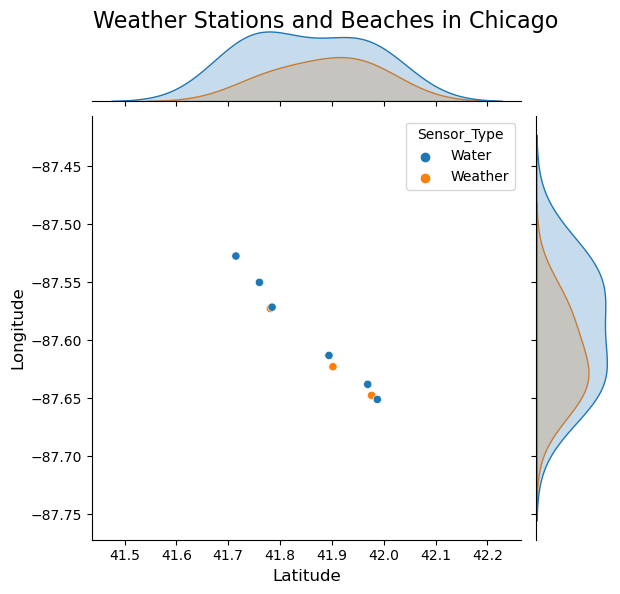

In [11]:
# Create the joint plot for the locations data to check the nearest weather stations to the sensors which are in two different datasets
joint_plot = sns.jointplot(x='Latitude', y='Longitude', hue='Sensor_Type', kind='scatter', data=locations)

# Add title and labels
joint_plot.fig.suptitle('Weather Stations and Beaches in Chicago', fontsize=16)
joint_plot.set_axis_labels('Latitude', 'Longitude', fontsize=12)

# Adjust the title position
plt.subplots_adjust(top=0.95)

# Show plot
plt.show()

The above plot shows, three weather stations are located nearer to the beach sensors.Since the weather stations are closer to beaches, we use the weather stations data in analysis of near by beaches.  

**EDA FOR WATER QUALITY DATA**

In [12]:
#Printing number of rows and columns in dataset
print("Number of rows in Beach Water Quality dataset: ", len(water_quality))
print("Number of columns in Beach Water Quality dataset: ", len(water_quality.columns))

Number of rows in Beach Water Quality dataset:  42935
Number of columns in Beach Water Quality dataset:  10


In [13]:
#Datatypes in Beach Water Quality Dataset
water_quality.dtypes

Beach_Name                      object
Measurement_Timestamp           object
Water_Temperature              float64
Turbidity                      float64
Transducer_Depth               float64
Wave_Height                    float64
Wave_Period                    float64
Battery_Life                   float64
Measurement_Timestamp_Label     object
Measurement_ID                  object
dtype: object

In [14]:
# Convert 'Measurement_Timestamp' to datetime format
water_quality['Measurement_Timestamp'] = pd.to_datetime(water_quality['Measurement_Timestamp'])

# Extract year and month from the Beach Water quality dataset for analysis on  yealrly and monthlywise
water_quality['Year_Month'] = water_quality['Measurement_Timestamp'].dt.to_period('M')
water_quality['Year'] = water_quality['Measurement_Timestamp'].dt.year
water_quality['Month'] = water_quality['Measurement_Timestamp'].dt.month

# Map month number to month name
water_quality['Month'] = water_quality['Month'].apply(lambda x: calendar.month_name[x])
#Extract Time from Measurement_Timestamp for hourly analysis
water_quality['Time'] = water_quality['Measurement_Timestamp'].dt.time
# Convert 'Time' column to datetime format
#water_quality['Time'] = pd.to_datetime(water_quality['Time'])

#Categorizing hourly data to Morning,Afternoon and Night Categories for analysis of Beach water quality data on Timer category basis.
# Define time intervals and corresponding categories
time_intervals = {
    (0, 6): 'Night',        # Night: 12:00 AM to 6:00 AM
    (6, 12): 'Morning',     # Morning: 6:00 AM to 12:00 PM
    (12, 18): 'Afternoon',  # Afternoon: 12:00 PM to 6:00 PM
    (18, 24): 'Night'       # Night: 6:00 PM to 12:00 AM
}

# Function to map time values to categories
def categorize_time(time):
    hour = time.hour
    for interval, category in time_intervals.items():
        if interval[0] <= hour < interval[1]:
            return category

# Apply categorization to 'Time' column
water_quality['Time_Category'] = water_quality['Time'].apply(categorize_time)

C:\Users\HP\AppData\Local\Temp\ipykernel_11460\3046936269.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  water_quality['Measurement_Timestamp'] = pd.to_datetime(water_quality['Measurement_Timestamp'])


In [15]:
#Printing Beach water quality dataset
water_quality.head(100)

Beach_Name Measurement_Timestamp  Water_Temperature  Turbidity  \
0       Calumet Beach   2018-04-07 00:30:00               21.7       3.15   
1   Ohio Street Beach   2019-06-14 19:00:00               16.0       2.18   
2   Ohio Street Beach   2018-05-16 13:00:00               21.7       1.92   
3   Ohio Street Beach   2018-05-16 14:00:00               21.9       1.81   
4   Ohio Street Beach   2018-06-04 09:00:00               23.0       0.03   
..                ...                   ...                ...        ...   
95  Ohio Street Beach   2018-06-06 17:00:00               16.7       3.33   
96  Ohio Street Beach   2018-06-06 18:00:00               16.8       3.20   
97  Ohio Street Beach   2018-06-06 19:00:00               16.4       3.10   
98  Ohio Street Beach   2018-06-06 20:00:00               16.4       3.02   
99  Ohio Street Beach   2018-06-06 23:00:00               16.2       2.82   

    Transducer_Depth  Wave_Height  Wave_Period  Battery_Life  \
0                NaN        0.389          3.0           0.0   
1                NaN        0.137          3.0          11.8   
2                NaN        0.023          1.0          10.3   
3                NaN        0.026          6.0          10.3   
4                NaN        0.021          8.0          12.4   
..               ...          ...          ...           ...   
95               NaN        0.170          4.0          11.8   
96               NaN        0.164          4.0          11.8   
97               NaN        0.185          4.0          11.8   
98               NaN        0.161          4.0          11.8   
99               NaN        0.133          3.0          11.8   

   Measurement_Timestamp_Label               Measurement_ID Year_Month  Year  \
0          04/07/2018 12:30 AM     CalumetBeach201804072430    2018-04  2018   
1           06/14/2019 7:00 PM  OhioStreetBeach201906141900    2019-06  2019   
2           05/16/2018 1:00 PM  OhioStreetBeach201805161300    2018-05  2018   
3           05/16/2018 2:00 PM  OhioStreetBeach201805161400    2018-05  2018   
4           06/04/2018 9:00 AM  OhioStreetBeach201806040900    2018-06  2018   
..                         ...                          ...        ...   ...   
95          06/06/2018 5:00 PM  OhioStreetBeach201806061700    2018-06  2018   
96          06/06/2018 6:00 PM  OhioStreetBeach201806061800    2018-06  2018   
97          06/06/2018 7:00 PM  OhioStreetBeach201806061900    2018-06  2018   
98          06/06/2018 8:00 PM  OhioStreetBeach201806062000    2018-06  2018   
99         06/06/2018 11:00 PM  OhioStreetBeach201806062300    2018-06  2018   

    Month      Time Time_Category  
0   April  00:30:00         Night  
1    June  19:00:00         Night  
2     May  13:00:00     Afternoon  
3     May  14:00:00     Afternoon  
4    June  09:00:00       Morning  
..    ...       ...           ...  
95   June  17:00:00     Afternoon  
96   June  18:00:00         Night  
97   June  19:00:00         Night  
98   June  20:00:00         Night  
99   June  23:00:00         Night  

[100 rows x 15 columns]

In [16]:
# Check for missing values
print(water_quality.isnull().sum())

Beach_Name                         0
Measurement_Timestamp              0
Water_Temperature                386
Turbidity                        386
Transducer_Depth               32901
Wave_Height                      613
Wave_Period                      613
Battery_Life                     386
Measurement_Timestamp_Label        0
Measurement_ID                     0
Year_Month                         0
Year                               0
Month                              0
Time                               0
Time_Category                      0
dtype: int64


In [17]:
#Finding the percentage of null values in each column of dataset.Based on percentage of missing values, we can make decision handling null values
null_percentage = (water_quality.isnull().sum() / len(water_quality)) * 100

print("Percentage of null values in each column:")
print(null_percentage)

Percentage of null values in each column:
Beach_Name                      0.000000
Measurement_Timestamp           0.000000
Water_Temperature               0.899033
Turbidity                       0.899033
Transducer_Depth               76.629789
Wave_Height                     1.427740
Wave_Period                     1.427740
Battery_Life                    0.899033
Measurement_Timestamp_Label     0.000000
Measurement_ID                  0.000000
Year_Month                      0.000000
Year                            0.000000
Month                           0.000000
Time                            0.000000
Time_Category                   0.000000
dtype: float64


We have a lots of missing values in few columns so lets replace them by -100000 because sentinel value like -100000 is used in distinguishing missing data from valid data, especially if the valid data range does not include this sentinel value. and also The value -100000 is chosen because it is likely outside the range of realistic values for these measurements, ensuring it stands out as an indicator of missing data.

Also, there are multiple missing values in transducer_depth column so We are filling them using mean values

In [18]:
#Replacing Null values with -100000
columns_to_replace = ['Wave_Period','Water_Temperature','Turbidity']
for col in columns_to_replace:
    water_quality[col].fillna(-100000, inplace=True)

# Forward fill null values in 'Battery_Life' columns
water_quality['Battery_Life'].fillna(method='ffill', inplace=True)
water_quality['Transducer_Depth'].fillna(water_quality['Transducer_Depth'].mean(), inplace=True)
water_quality['Wave_Height'].fillna(-99999.992, inplace=True)

In [19]:
#printing count of null values in each column
print(water_quality.isnull().sum())

Beach_Name                     0
Measurement_Timestamp          0
Water_Temperature              0
Turbidity                      0
Transducer_Depth               0
Wave_Height                    0
Wave_Period                    0
Battery_Life                   0
Measurement_Timestamp_Label    0
Measurement_ID                 0
Year_Month                     0
Year                           0
Month                          0
Time                           0
Time_Category                  0
dtype: int64


As part of the hypotheses we are not using few columns such as battery life , measurement timestamp label, measurement id, so we are dropping them to make the dataset effective for future uses.

In [20]:
# List of columns to drop
columns_to_drop = [
    'Battery_Life', 'Measurement_Timestamp_Label', 'Measurement_ID'
]

# Drop columns
water_quality = water_quality.drop(columns=columns_to_drop)

In [21]:
water_quality.head()

Beach_Name Measurement_Timestamp  Water_Temperature  Turbidity  \
0      Calumet Beach   2018-04-07 00:30:00               21.7       3.15   
1  Ohio Street Beach   2019-06-14 19:00:00               16.0       2.18   
2  Ohio Street Beach   2018-05-16 13:00:00               21.7       1.92   
3  Ohio Street Beach   2018-05-16 14:00:00               21.9       1.81   
4  Ohio Street Beach   2018-06-04 09:00:00               23.0       0.03   

   Transducer_Depth  Wave_Height  Wave_Period Year_Month  Year  Month  \
0          1.570235        0.389          3.0    2018-04  2018  April   
1          1.570235        0.137          3.0    2019-06  2019   June   
2          1.570235        0.023          1.0    2018-05  2018    May   
3          1.570235        0.026          6.0    2018-05  2018    May   
4          1.570235        0.021          8.0    2018-06  2018   June   

       Time Time_Category  
0  00:30:00         Night  
1  19:00:00         Night  
2  13:00:00     Afternoon  
3  14:00:00     Afternoon  
4  09:00:00       Morning

In [22]:
#print the data types of each attribute
water_quality.dtypes

Beach_Name                       object
Measurement_Timestamp    datetime64[ns]
Water_Temperature               float64
Turbidity                       float64
Transducer_Depth                float64
Wave_Height                     float64
Wave_Period                     float64
Year_Month                    period[M]
Year                              int32
Month                            object
Time                             object
Time_Category                    object
dtype: object

In [23]:
water_quality.reset_index()

index               Beach_Name Measurement_Timestamp  \
0          0            Calumet Beach   2018-04-07 00:30:00   
1          1        Ohio Street Beach   2019-06-14 19:00:00   
2          2        Ohio Street Beach   2018-05-16 13:00:00   
3          3        Ohio Street Beach   2018-05-16 14:00:00   
4          4        Ohio Street Beach   2018-06-04 09:00:00   
...      ...                      ...                   ...   
42930  42930            Calumet Beach   2016-09-20 13:00:00   
42931  42931           Montrose Beach   2016-09-14 19:00:00   
42932  42932  Old - Ohio Street Beach   2021-08-27 16:00:00   
42933  42933           Osterman Beach   2015-09-10 10:00:00   
42934  42934            Rainbow Beach   2015-10-01 07:00:00   

       Water_Temperature  Turbidity  Transducer_Depth  Wave_Height  \
0                   21.7       3.15          1.570235        0.389   
1                   16.0       2.18          1.570235        0.137   
2                   21.7       1.92          1.570235        0.023   
3                   21.9       1.81          1.570235        0.026   
4                   23.0       0.03          1.570235        0.021   
...                  ...        ...               ...          ...   
42930               21.7       3.15          1.570235        0.389   
42931               21.9       0.01          1.570235        0.360   
42932               24.9       0.80          1.570235        0.205   
42933               18.6       0.37          1.570235        0.159   
42934               14.1       0.00          1.570235   -99999.992   

       Wave_Period Year_Month  Year      Month      Time Time_Category  
0              3.0    2018-04  2018      April  00:30:00         Night  
1              3.0    2019-06  2019       June  19:00:00         Night  
2              1.0    2018-05  2018        May  13:00:00     Afternoon  
3              6.0    2018-05  2018        May  14:00:00     Afternoon  
4              8.0    2018-06  2018       June  09:00:00       Morning  
...            ...        ...   ...        ...       ...           ...  
42930          3.0    2016-09  2016  September  13:00:00     Afternoon  
42931          3.0    2016-09  2016  September  19:00:00         Night  
42932          5.0    2021-08  2021     August  16:00:00     Afternoon  
42933          2.0    2015-09  2015  September  10:00:00       Morning  
42934    -100000.0    2015-10  2015    October  07:00:00       Morning  

[42935 rows x 13 columns]

As we know the null values are replaced by -100000 and -99999.992, Lets exclude those values before plotting a box plot

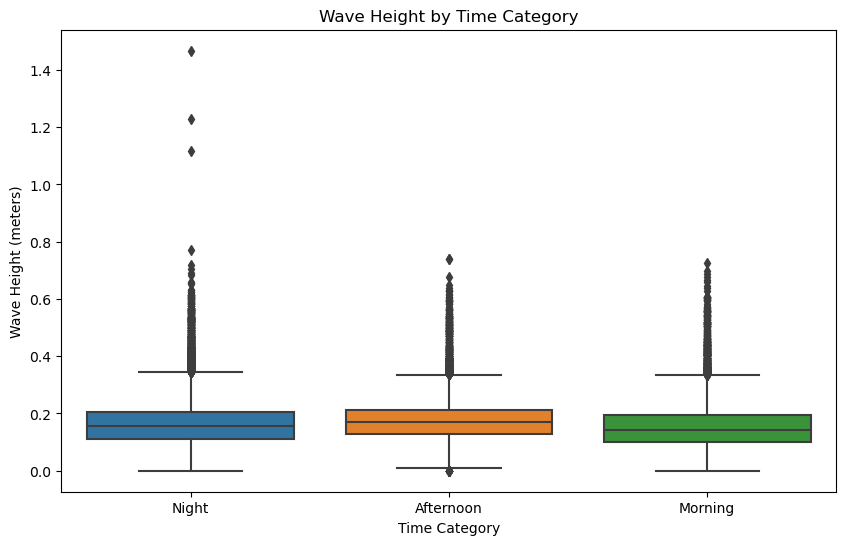

In [24]:
# Filter rows excluding values equal to -100000
water_quality = water_quality[(water_quality['Water_Temperature'] != -100000)&(water_quality['Wave_Period'] != -100000)&(water_quality['Turbidity'] != -100000)&(water_quality['Wave_Height'] != -99999.992)]

# Plotting Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_Category', y='Wave_Height', data=water_quality)
plt.title('Wave Height by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Wave Height (meters)')
plt.show()

**Observation:**

The box plot above indicates that wave height remains relatively consistent throughout the day with similar medians and interquartile ranges across Night, Afternoon, and Morning. Outliers are present but do not follow a specific pattern tied to the time of day.

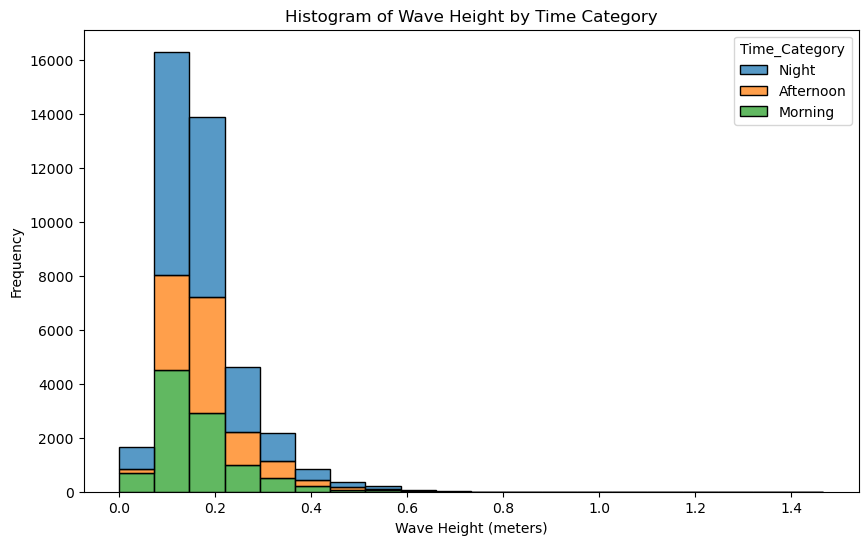

In [25]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=water_quality, x='Wave_Height', hue='Time_Category', multiple="stack", bins=20)

# Set the title and labels
plt.title('Histogram of Wave Height by Time Category')
plt.xlabel('Wave Height (meters)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Observations:**

1. The majority of wave heights are concentrated between 0 and 0.2 meters across all time categories.

2. The frequency decreases as wave height increases, indicating fewer occurrences of higher waves.

3. Night time has the highest frequency of wave heights around 0.2 meters, followed by Afternoon and Morning. This suggests that wave heights are generally more prominent during the Night compared to other times of the day.

4. This distribution indicates that wave height is generally consistent but slightly more pronounced at night.



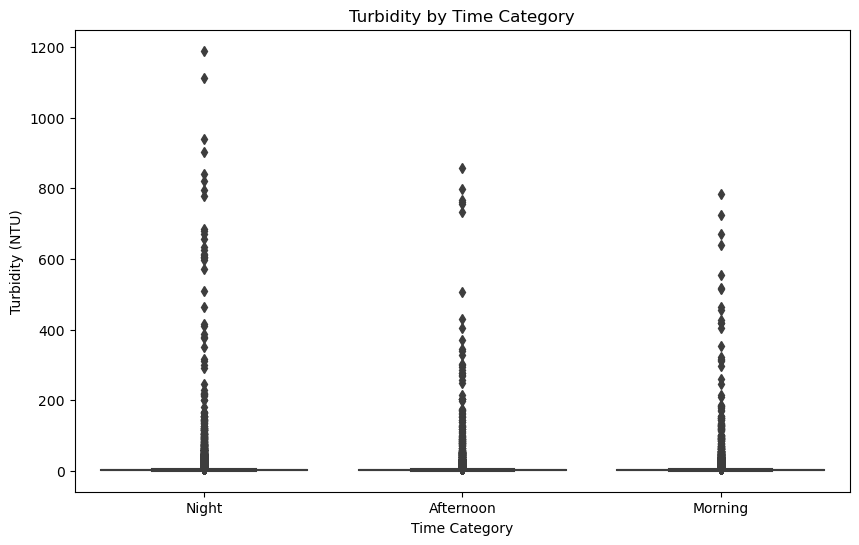

In [26]:
# Plotting Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_Category', y='Turbidity', data=water_quality)
plt.title('Turbidity by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Turbidity (NTU)')
plt.show()

**Observation:**

The box plot indicates that turbidity levels are generally low and consistent throughout the day, with similar medians and interquartile ranges across Night, Afternoon, and Morning. The presence of outliers indicates occasional spikes in turbidity, but these do not follow a specific pattern tied to the time of day.

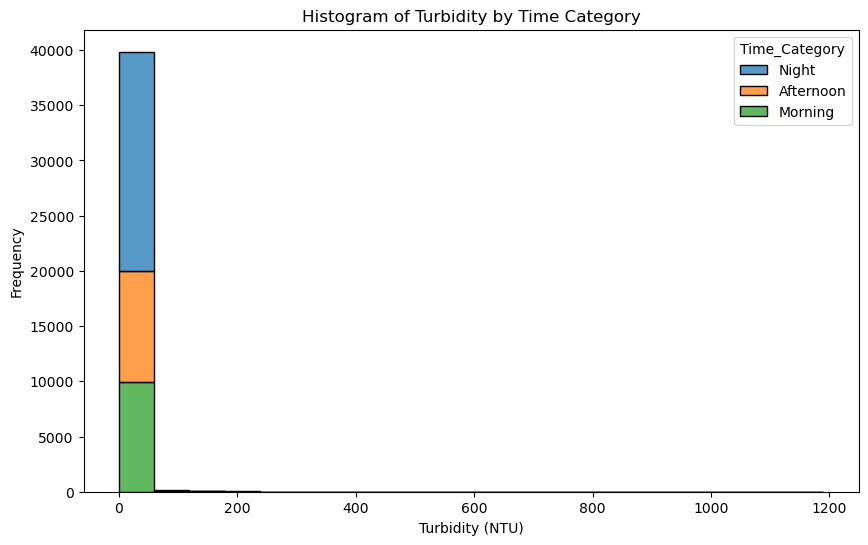

In [27]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=water_quality, x='Turbidity', hue='Time_Category', multiple="stack", bins=20)

# Set the title and labels
plt.title('Histogram of Turbidity by Time Category')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Observation:**

The histogram indicates that turbidity levels are predominantly low, with most values clustered around 0 NTU. Higher turbidity values are infrequent and observed across all time categories, with a slight increase at night. This pattern suggests that the time of day may influence turbidity levels, as Night shows the highest occurrence of low turbidity values.

**Let's analyze the water quality with original data and rolling average data to observe the changes in pattern**

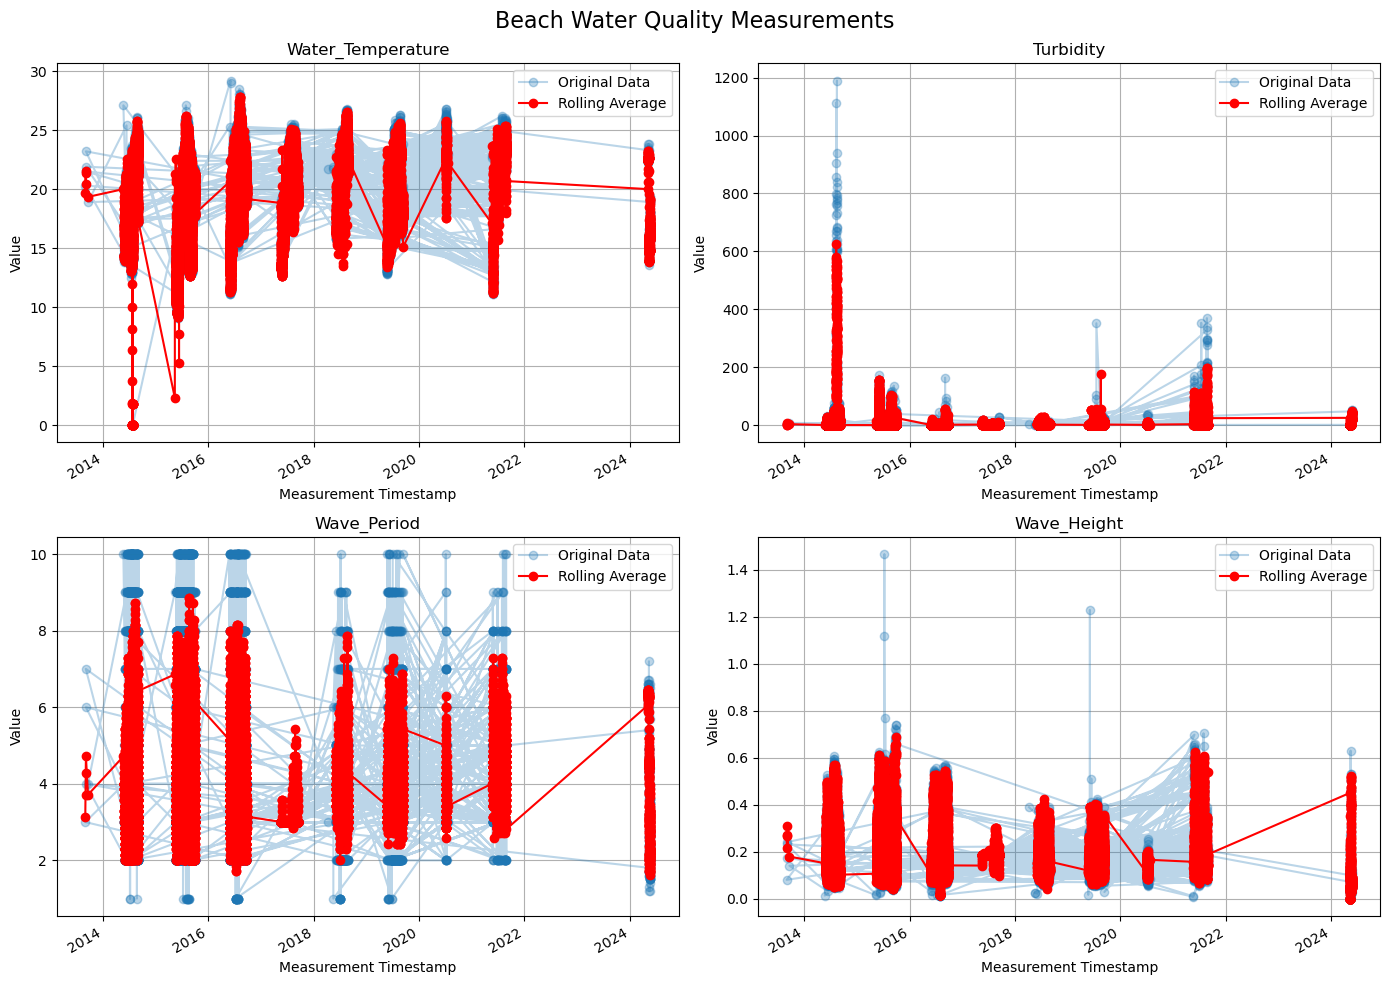

In [28]:
# Filter rows excluding values equal to -100000
water_quality = water_quality[(water_quality['Water_Temperature'] != -100000)&(water_quality['Wave_Period'] != -100000)&(water_quality['Turbidity'] != -100000)&(water_quality['Wave_Height'] != -99999.992)]
# Convert the 'Measurement_Timestamp' to datetime if it's not already
water_quality['Measurement_Timestamp'] = pd.to_datetime(water_quality['Measurement_Timestamp'])

# Set 'Measurement_Timestamp' as the index for easier plotting
water_quality.set_index('Measurement_Timestamp', inplace=True)

# Calculate rolling averages with a window size of 7 . Window size of means 7 samples of data is used to calcualte the rolling mean.
rolling_window = 7
columns_to_plot = ['Water_Temperature', 'Turbidity', 'Wave_Period', 'Wave_Height']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plotting the original data with low opacity
    ax.plot(water_quality.index, water_quality[column], marker='o', linestyle='-', alpha=0.3, label='Original Data')

    # Plotting the rolling average
    water_quality[column].rolling(window=rolling_window).mean().plot(ax=ax, marker='o', linestyle='-', color='red', label='Rolling Average')

    ax.set_title(column)
    ax.set_xlabel('Measurement Timestamp')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()
# General title for the entire plot
fig.suptitle('Beach Water Quality Measurements', fontsize=16)
plt.tight_layout()
plt.show()

The above graphs shows the water quality measurements at various beaches from 2014-2022.In the above the graph, moving average is used to find the trend in the data. And also the moving average provides more smoother data.A rolling window, also known as a moving window or sliding window, is a technique used in time series analysis and data processing where a fixed-size subset of sequential data points is continuously moved or "rolled" over the dataset to perform computations on each subset. This technique is commonly used for smoothing, trend analysis, and feature extraction.

The graph highlights seasonal trends in water temperature and wave period, while turbidity and wave height show variability and notable outliers. The rolling averages smooth out these trends, providing a clearer picture of the underlying patterns in beach water quality measurements over time.

**Observing relationship between wave period and wave heights recorded in the datasets**

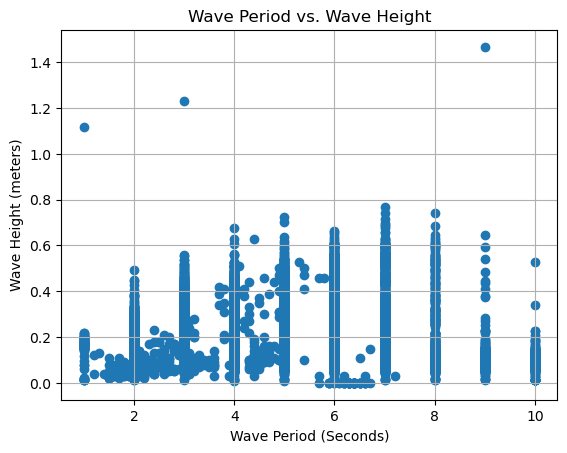

Correlation coefficient between wave period and wave height: 0.057396050995232956


In [29]:
# Filter out rows with -100000 values in 'Wave_Period' or 'Wave_Height' columns
water_quality_wave_corr = water_quality[(water_quality['Wave_Period'] != -100000) & (water_quality['Wave_Height'] != -99999.992)]

# Calculate correlation coefficient
correlation = water_quality_wave_corr['Wave_Period'].corr(water_quality_wave_corr['Wave_Height'])

# Plot the relationship between wave period and wave height
plt.scatter(water_quality_wave_corr['Wave_Period'], water_quality_wave_corr['Wave_Height'])
plt.title('Wave Period vs. Wave Height')
plt.xlabel('Wave Period (Seconds)')
plt.ylabel('Wave Height (meters)')
plt.grid(True)
plt.show()

print("Correlation coefficient between wave period and wave height:", correlation)

A correlation coefficient of 0.05729359059896284 between wave period and wave height indicates a very weak positive linear relationship between the two variables. This value is close to 0, suggesting that there is almost no linear association between wave height and wave period in the dataset. Essentially, changes in wave period do not significantly explain changes in wave height, and vice versa.

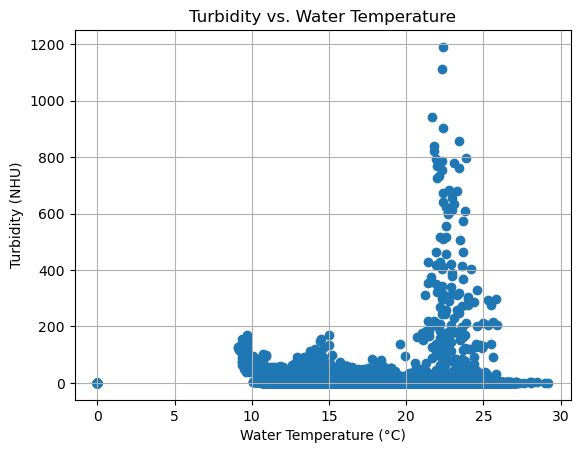

Correlation coefficient between turbidity and water temperature: -0.006363406475994058


In [30]:
# Filter out rows with -100000 values in 'Wave_Period' or 'Wave_Height' columns
water_quality_Turbidity_corr = water_quality[(water_quality['Water_Temperature'] != -100000) & (water_quality['Turbidity'] != -100000)]
# Calculate correlation coefficient
correlation = water_quality_Turbidity_corr['Water_Temperature'].corr(water_quality['Turbidity'])

# Plot the relationship between turbidity and water temperature
plt.scatter(water_quality_Turbidity_corr['Water_Temperature'], water_quality_Turbidity_corr['Turbidity'])
plt.title('Turbidity vs. Water Temperature')
plt.xlabel('Water Temperature (°C)')
plt.ylabel('Turbidity (NHU)')
plt.grid(True)
plt.show()

print("Correlation coefficient between turbidity and water temperature:", correlation)

In general, Water temperature and turbidity are inversely proportional, the correlation coefficient indicating negative values tells the same, but the value is close to zero suggesting that there is almost no linear association between water temperature and turbidity. Changes in water temperature do not significantly explain changes in turbidity, and vice versa.

**EDA FOR WEATHER DATA**

In [31]:
#Print first few columns of the weather data
weather.head()

Station_Name   Measurement_Timestamp  Air_Temperature  \
0  63rd Street Weather Station  09/27/2018 10:00:00 AM            16.40   
1  63rd Street Weather Station  09/27/2018 11:00:00 AM            17.10   
2  63rd Street Weather Station  09/27/2018 01:00:00 PM            18.20   
3       Foster Weather Station  09/27/2018 01:00:00 PM            17.89   
4  63rd Street Weather Station  09/27/2018 03:00:00 PM            19.50   

   Wet_Bulb_Temperature  Humidity  Rain_Intensity  Interval_Rain  Total_Rain  \
0                  12.2        61             0.0            0.0       260.3   
1                  11.5        51             0.0            0.0       260.3   
2                  12.4        51             0.0            0.0       260.3   
3                   NaN        39             NaN            0.0         NaN   
4                  13.0        47             0.0            0.0       260.3   

   Precipitation_Type  Wind_Direction  Wind_Speed  Maximum_Wind_Speed  \
0                 0.0             231         2.5                 4.7   
1                 0.0             244         3.6                 5.7   
2                 0.0             248         3.1                 5.3   
3                 NaN             249         1.4                 2.3   
4                 0.0             249         3.1                 5.7   

   Barometric_Pressure  Solar_Radiation  Heading  Battery_Life  \
0                996.3              484    356.0          11.9   
1                995.4              468    356.0          11.9   
2                994.8              377    355.0          11.9   
3                993.6                0      NaN          15.1   
4                992.9              461    355.0          11.9   

  Measurement_Timestamp_Label                        Measurement_ID  
0         09/27/2018 10:00 AM  63rdStreetWeatherStation201809271000  
1         09/27/2018 11:00 AM  63rdStreetWeatherStation201809271100  
2          09/27/2018 1:00 PM  63rdStreetWeatherStation201809271300  
3          09/27/2018 1:00 PM      FosterWeatherStation201809271300  
4          09/27/2018 3:00 PM  63rdStreetWeatherStation201809271500

In [32]:
#create a list of all the columns
weather.columns.tolist()

['Station_Name',
 'Measurement_Timestamp',
 'Air_Temperature',
 'Wet_Bulb_Temperature',
 'Humidity',
 'Rain_Intensity',
 'Interval_Rain',
 'Total_Rain',
 'Precipitation_Type',
 'Wind_Direction',
 'Wind_Speed',
 'Maximum_Wind_Speed',
 'Barometric_Pressure',
 'Solar_Radiation',
 'Heading',
 'Battery_Life',
 'Measurement_Timestamp_Label',
 'Measurement_ID']

In [33]:
#observing the statistical values observed from the data
weather.describe()

Air_Temperature  Wet_Bulb_Temperature       Humidity  Rain_Intensity  \
count    171774.000000         108707.000000  171849.000000   108707.000000   
mean         12.408859             10.181784      68.393229        0.166302   
std          10.429795              9.396448      15.725779        1.865939   
min         -29.780000            -28.900000       6.000000        0.000000   
25%           4.100000              2.900000      58.000000        0.000000   
50%          13.300000             11.400000      69.000000        0.000000   
75%          21.300000             18.300000      80.000000        0.000000   
max          37.600000             28.400000     100.000000      183.600000   

       Interval_Rain     Total_Rain  Precipitation_Type  Wind_Direction  \
count  171849.000000  108707.000000       108707.000000   171849.000000   
mean        0.147835     149.023988            4.371890      149.875652   
std         1.129559     197.935651           15.765902      120.139127   
min        -0.900000       0.000000            0.000000        0.000000   
25%         0.000000      16.100000            0.000000       22.000000   
50%         0.000000      55.500000            0.000000      129.000000   
75%         0.000000     214.600000            0.000000      264.000000   
max        63.420000    1056.100000           70.000000      359.000000   

          Wind_Speed  Maximum_Wind_Speed  Barometric_Pressure  \
count  171849.000000       171849.000000        171703.000000   
mean        2.942812            3.803575           994.269701   
std         5.692185            6.261017             8.580205   
min         0.000000            0.000000           958.700000   
25%         1.600000            1.600000           990.200000   
50%         2.800000            3.300000           994.200000   
75%         3.500000            5.400000           998.600000   
max       999.900000          999.900000          3098.500000   

       Solar_Radiation        Heading   Battery_Life  
count    171849.000000  108707.000000  171849.000000  
mean        108.142736     273.861251      13.101318  
std         896.629554     147.918484       1.526540  
min     -100000.000000       0.000000      11.200000  
25%           0.000000     349.000000      11.900000  
50%           4.000000     354.000000      12.000000  
75%         121.000000     357.000000      15.100000  
max        1277.000000     359.000000      15.300000

In [34]:
#checking the null values in the dataset
weather.isnull().sum()

Station_Name                       0
Measurement_Timestamp              0
Air_Temperature                   75
Wet_Bulb_Temperature           63142
Humidity                           0
Rain_Intensity                 63142
Interval_Rain                      0
Total_Rain                     63142
Precipitation_Type             63142
Wind_Direction                     0
Wind_Speed                         0
Maximum_Wind_Speed                 0
Barometric_Pressure              146
Solar_Radiation                    0
Heading                        63142
Battery_Life                       0
Measurement_Timestamp_Label        0
Measurement_ID                     0
dtype: int64

In [35]:
#ca;culating the null value percentage
null_percentage = (weather.isnull().sum() / len(weather)) * 100

print("Percentage of null values in each column:")
print(null_percentage)

Percentage of null values in each column:
Station_Name                    0.000000
Measurement_Timestamp           0.000000
Air_Temperature                 0.043643
Wet_Bulb_Temperature           36.742722
Humidity                        0.000000
Rain_Intensity                 36.742722
Interval_Rain                   0.000000
Total_Rain                     36.742722
Precipitation_Type             36.742722
Wind_Direction                  0.000000
Wind_Speed                      0.000000
Maximum_Wind_Speed              0.000000
Barometric_Pressure             0.084958
Solar_Radiation                 0.000000
Heading                        36.742722
Battery_Life                    0.000000
Measurement_Timestamp_Label     0.000000
Measurement_ID                  0.000000
dtype: float64


The data has some missing values in few attributes, lets fill them by linear interpolation

In [36]:
columns_to_replace = ['Wet_Bulb_Temperature','Rain_Intensity','Total_Rain','Precipitation_Type','Heading','Air_Temperature','Barometric_Pressure']
for col in columns_to_replace:
    weather[col].interpolate(method='linear', inplace=True)

In [37]:
#checking if interpolation worked or not
weather.isnull().sum()

Station_Name                   0
Measurement_Timestamp          0
Air_Temperature                0
Wet_Bulb_Temperature           0
Humidity                       0
Rain_Intensity                 0
Interval_Rain                  0
Total_Rain                     0
Precipitation_Type             0
Wind_Direction                 0
Wind_Speed                     0
Maximum_Wind_Speed             0
Barometric_Pressure            0
Solar_Radiation                0
Heading                        0
Battery_Life                   0
Measurement_Timestamp_Label    0
Measurement_ID                 0
dtype: int64

In [38]:
# List of columns to drop which are not used for furthur analysis
columns_to_drop = [
    'Measurement_Timestamp_Label', 'Battery_Life', 'Measurement_ID'
]

# Drop columns
weather = weather.drop(columns=columns_to_drop)

In [39]:
# Convert 'Measurement_Timestamp' to datetime format
weather['Measurement_Timestamp'] = pd.to_datetime(weather['Measurement_Timestamp'])

# Extract year and month
weather['Year_Month_W'] = weather['Measurement_Timestamp'].dt.to_period('M')
# Extract year and month
weather['Year_W'] = weather['Measurement_Timestamp'].dt.year
weather['Month_W'] = weather['Measurement_Timestamp'].dt.month
# Map month number to month name
weather['Month_W'] = weather['Month_W'].apply(lambda x: calendar.month_name[x])
weather['Time'] = weather['Measurement_Timestamp'].dt.time
# Convert 'Time' column to datetime format
#water_quality['Time'] = pd.to_datetime(water_quality['Time'])

# Define time intervals and corresponding categories
time_intervals = {
    (0, 6): 'Night',        # Night: 12:00 AM to 6:00 AM
    (6, 12): 'Morning',     # Morning: 6:00 AM to 12:00 PM
    (12, 18): 'Afternoon',  # Afternoon: 12:00 PM to 6:00 PM
    (18, 24): 'Night'       # Night: 6:00 PM to 12:00 AM
}

# Function to map time values to categories
def categorize_time(time):
    hour = time.hour
    for interval, category in time_intervals.items():
        if interval[0] <= hour < interval[1]:
            return category

# Apply categorization to 'Time' column
weather['Time_Category'] = weather['Time'].apply(categorize_time)

In [40]:
#checking if the newly created column got added to the dataframe or not
weather.head()

Station_Name Measurement_Timestamp  Air_Temperature  \
0  63rd Street Weather Station   2018-09-27 10:00:00            16.40   
1  63rd Street Weather Station   2018-09-27 11:00:00            17.10   
2  63rd Street Weather Station   2018-09-27 13:00:00            18.20   
3       Foster Weather Station   2018-09-27 13:00:00            17.89   
4  63rd Street Weather Station   2018-09-27 15:00:00            19.50   

   Wet_Bulb_Temperature  Humidity  Rain_Intensity  Interval_Rain  Total_Rain  \
0                  12.2        61             0.0            0.0       260.3   
1                  11.5        51             0.0            0.0       260.3   
2                  12.4        51             0.0            0.0       260.3   
3                  12.7        39             0.0            0.0       260.3   
4                  13.0        47             0.0            0.0       260.3   

   Precipitation_Type  Wind_Direction  Wind_Speed  Maximum_Wind_Speed  \
0                 0.0             231         2.5                 4.7   
1                 0.0             244         3.6                 5.7   
2                 0.0             248         3.1                 5.3   
3                 0.0             249         1.4                 2.3   
4                 0.0             249         3.1                 5.7   

   Barometric_Pressure  Solar_Radiation  Heading Year_Month_W  Year_W  \
0                996.3              484    356.0      2018-09    2018   
1                995.4              468    356.0      2018-09    2018   
2                994.8              377    355.0      2018-09    2018   
3                993.6                0    355.0      2018-09    2018   
4                992.9              461    355.0      2018-09    2018   

     Month_W      Time Time_Category  
0  September  10:00:00       Morning  
1  September  11:00:00       Morning  
2  September  13:00:00     Afternoon  
3  September  13:00:00     Afternoon  
4  September  15:00:00     Afternoon

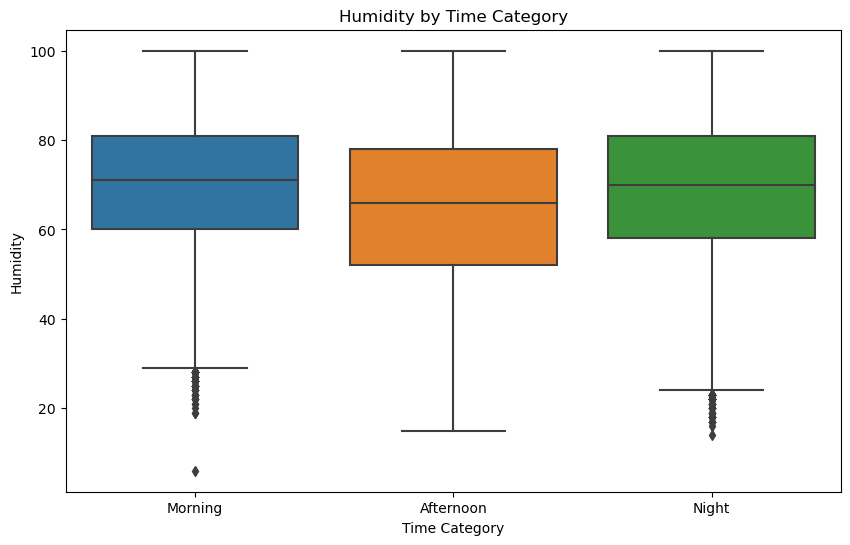

In [41]:
# Plotting Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_Category', y='Humidity', data=weather)
plt.title('Humidity by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Humidity')
plt.show()

Humidity levels are relatively consistent throughout the day, with slightly less variability in the Afternoon. Outliers are more common in the Morning and Night, indicating occasional lower humidity levels during these times.

**Histogram of Humidity by Time Category**

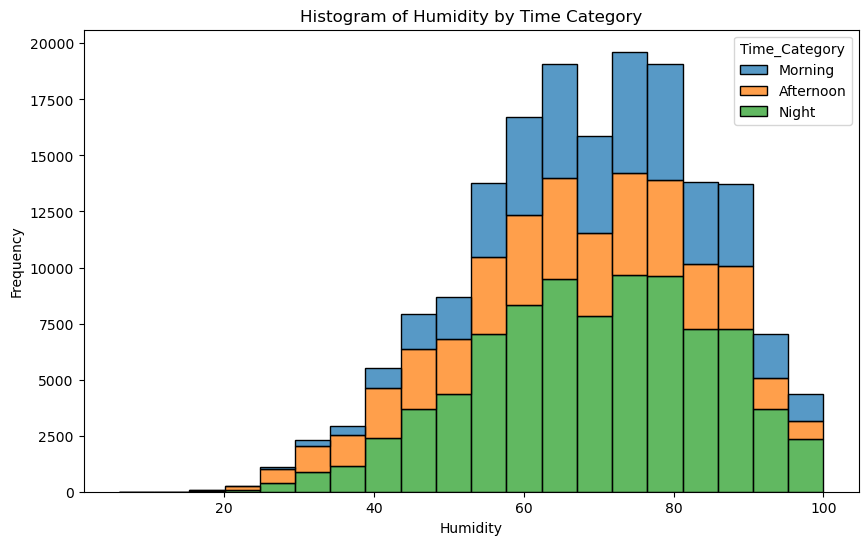

In [42]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=weather, x='Humidity', hue='Time_Category', multiple="stack", bins=20)

# Set the title and labels
plt.title('Histogram of Humidity by Time Category')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

1. The histogram shows a roughly normal distribution of humidity levels, with most values concentrated between 50% and 80%.The peak frequency occurs around 70-80%.

2. There is a slightly higher frequency of lower humidity values (20-40%) in the Morning and Night.

3. Morning and Night have a slightly higher frequency of lower humidity values.



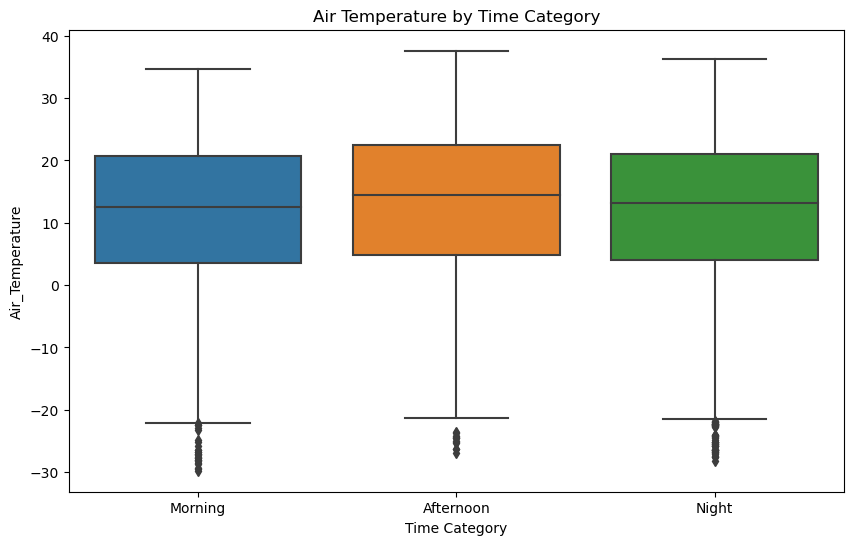

In [43]:
# Plotting Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_Category', y='Air_Temperature', data=weather)
plt.title('Air Temperature by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Air_Temperature')
plt.show()

Air temperatures are relatively consistent throughout the day, with similar medians and variability across Morning, Afternoon, and Night. Outliers are more common during Morning and Night, indicating occasional extremely low temperatures.

**Histogram of Air_Temperature by Time Category**

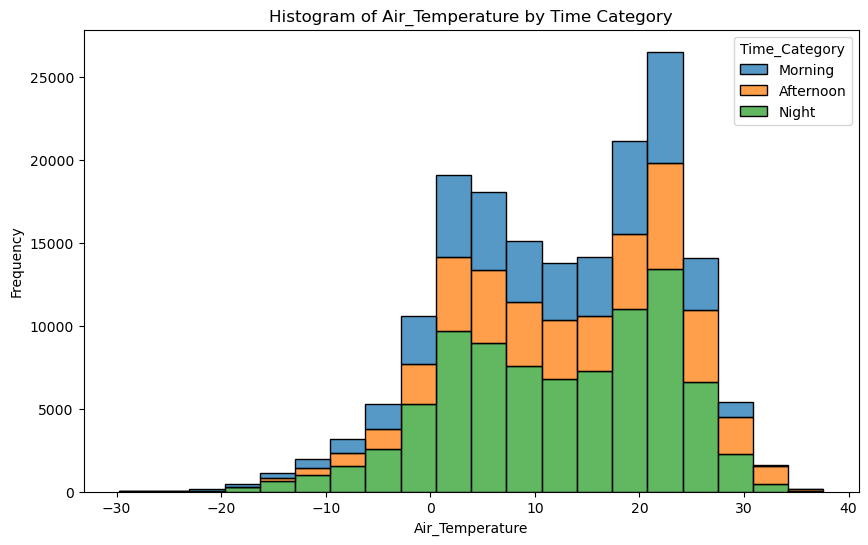

In [44]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=weather, x='Air_Temperature', hue='Time_Category', multiple="stack", bins=20)

# Set the title and labels
plt.title('Histogram of Air_Temperature by Time Category')
plt.xlabel('Air_Temperature')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Air temperatures are mostly clustered between 0°C and 20°C, with Morning showing the highest frequency around 20°C. Night temperatures occasionally drop below 0°C more frequently than during the other times of the day.

**Analysis of Wind Speed by Time Category**

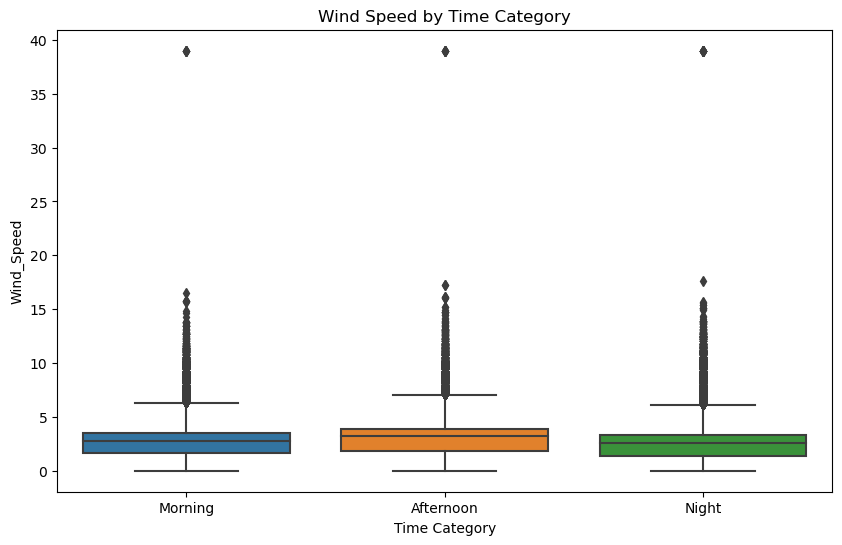

In [45]:
weather = weather[(weather['Wind_Speed'] != 999.9)]#Ignoring outlier
# Plotting Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_Category', y='Wind_Speed', data=weather)
plt.title('Wind Speed by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Wind_Speed')
plt.show()

Wind speeds are generally consistent throughout the day with similar median values and IQRs.

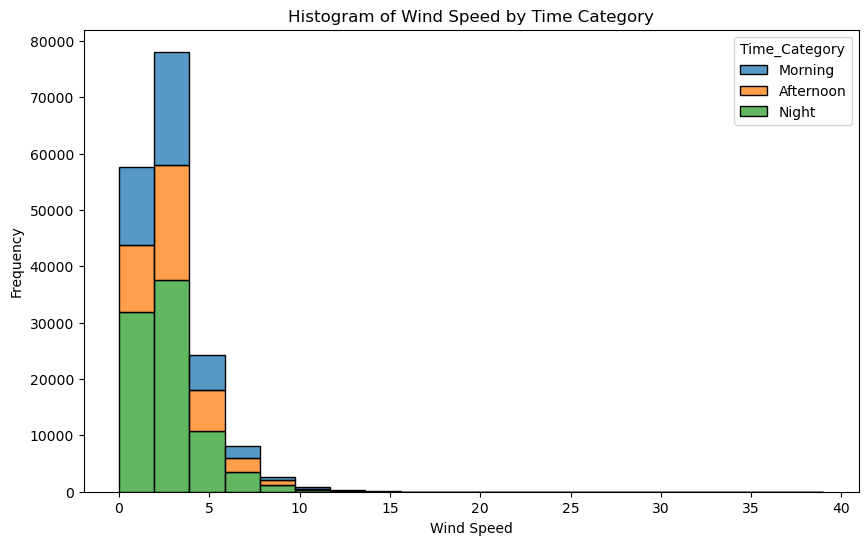

In [46]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=weather, x='Wind_Speed', hue='Time_Category', multiple="stack", bins=20)

# Set the title and labels
plt.title('Histogram of Wind Speed by Time Category')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Wind speeds are predominantly low, with most values between 0 and 5 m/s. Morning and Night have slightly higher frequencies in this range, indicating minor variations in wind speed throughout the day.

**Analysis of relation between Air Temperature and Wet bulb Temperature**

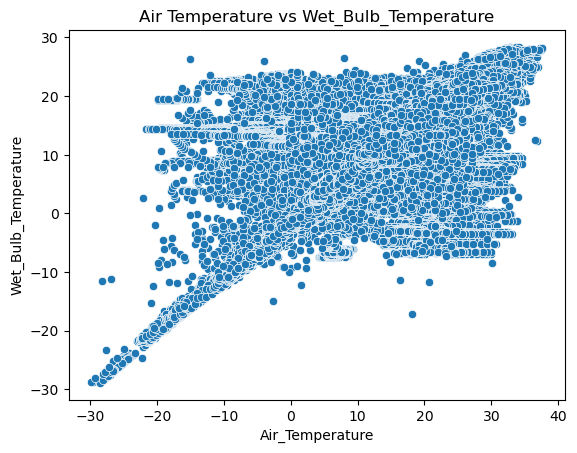

In [47]:
sns.scatterplot(x='Air_Temperature', y='Wet_Bulb_Temperature', data=weather)
plt.title('Air Temperature vs Wet_Bulb_Temperature')
plt.show()


The scatter plot shows a strong positive linear relationship between air temperature and wet bulb temperature, suggesting that these two variables are closely related.

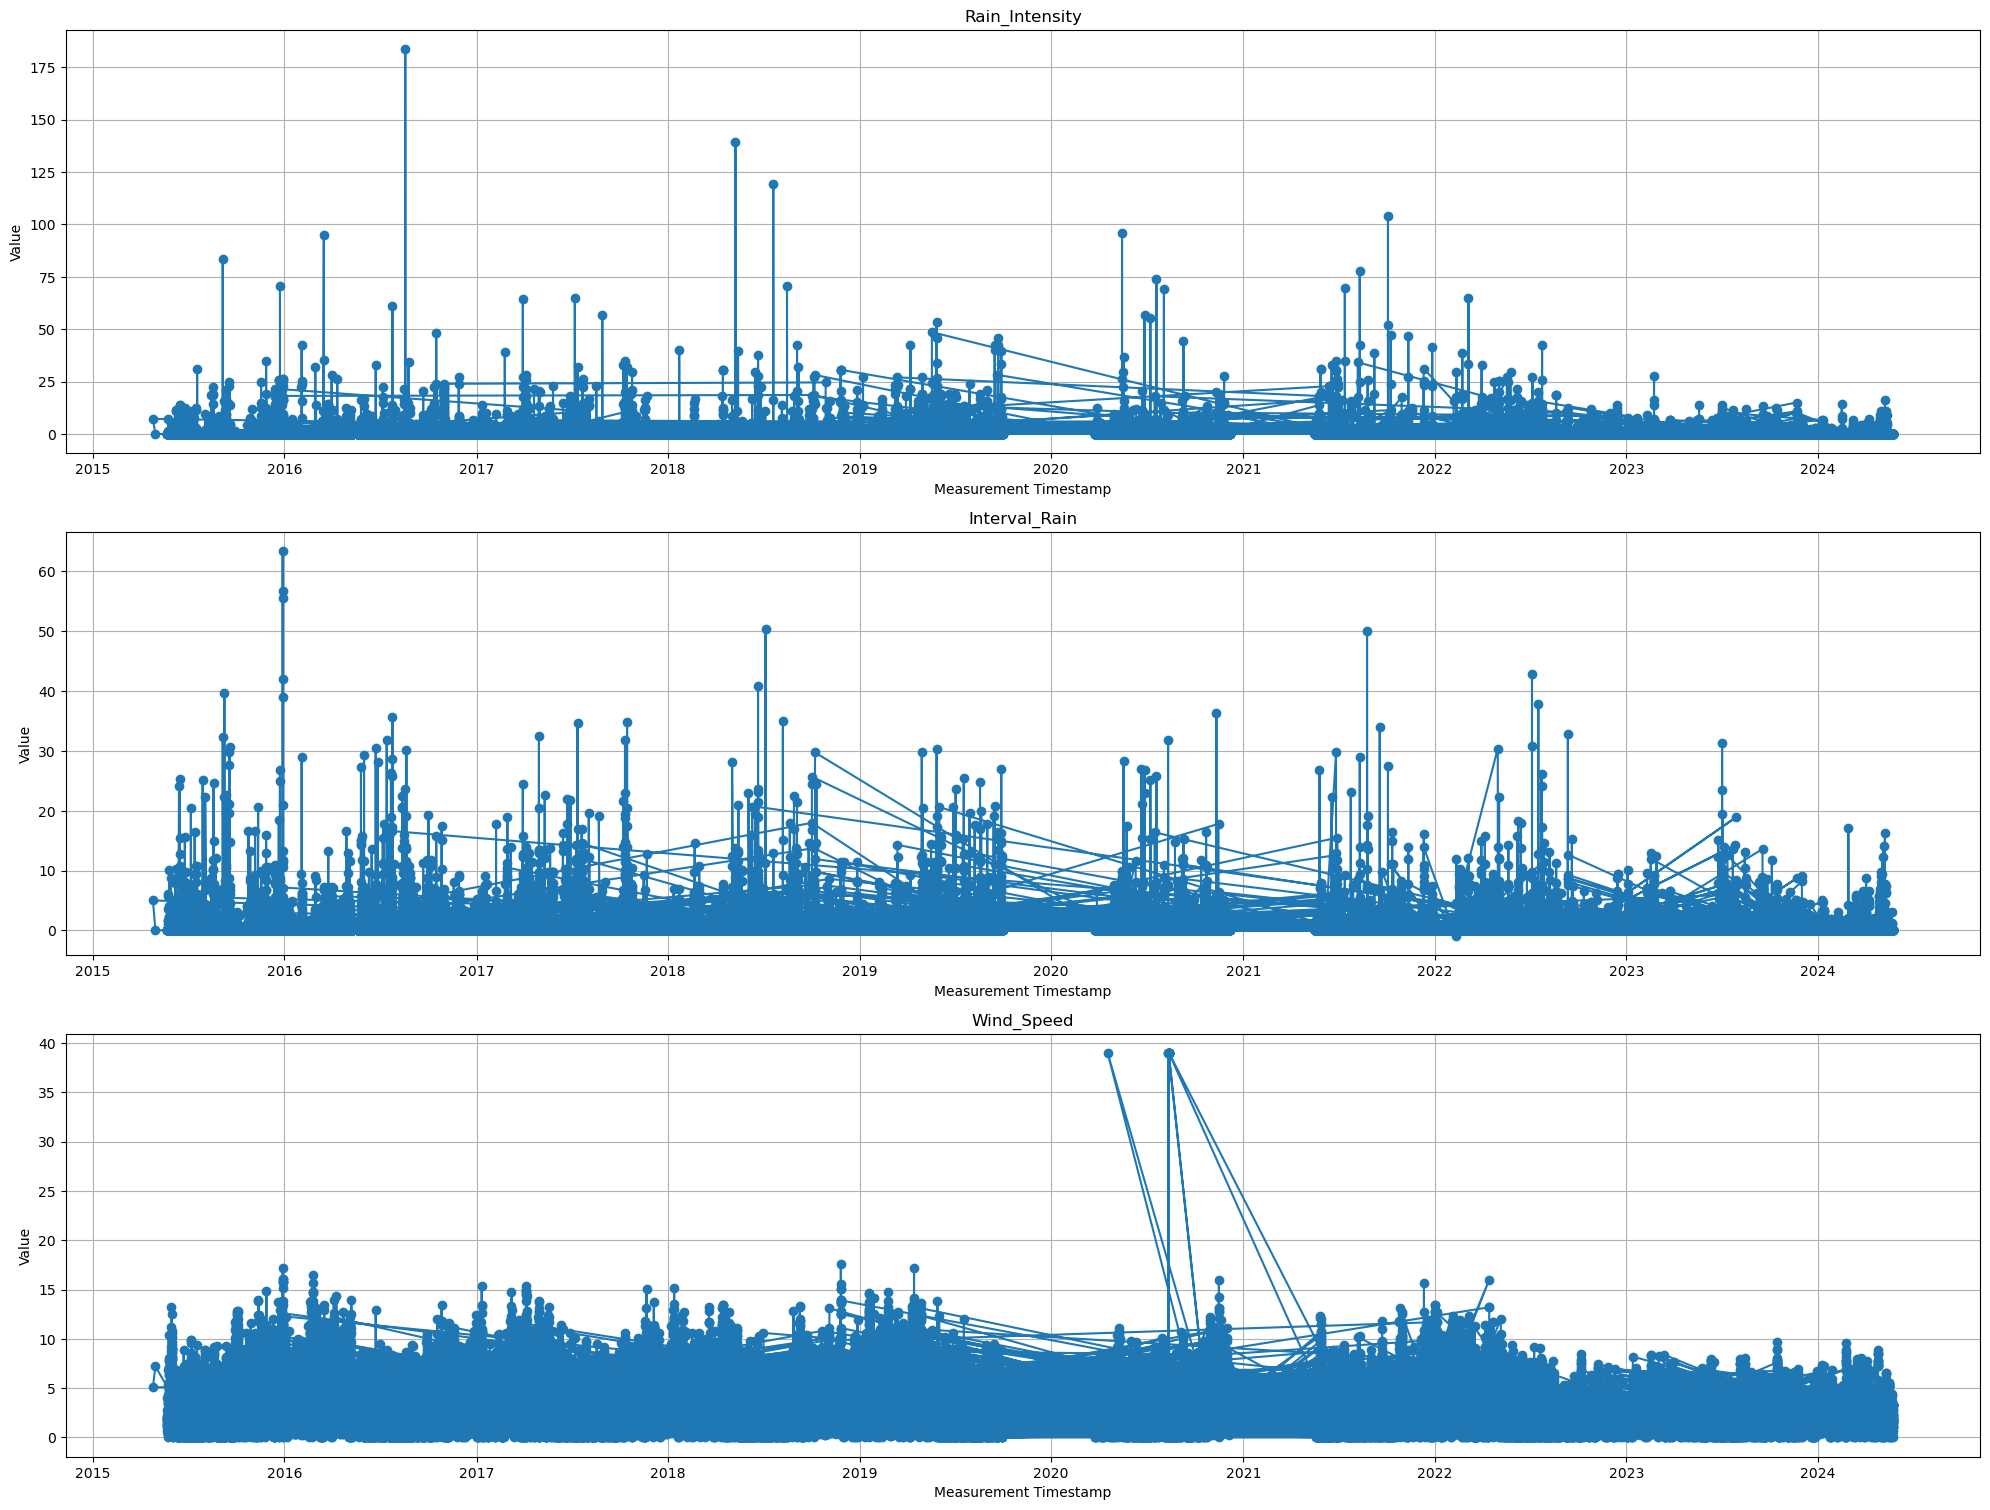

In [48]:

# Plotting
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(20, 80))

# List of columns to plot
columns_to_plot = [  'Rain_Intensity', 'Interval_Rain',
                      'Wind_Speed']

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(weather['Measurement_Timestamp'], weather[column], marker='o', linestyle='-')
    ax.set_title(column)
    ax.set_xlabel('Measurement Timestamp')
    ax.set_ylabel('Value')
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations from the above plots**

**Rain Intensity:**

There are periodic spikes in rain intensity, with some significant peaks around 2016 and 2017.
After 2020, there is a noticeable decrease in the frequency and intensity of rain events.

**Interval Rain:**

The plot shows several rain events with varying intensities over the years.
Rain events appear to be more frequent before 2020, with a decline in frequency and intensity in recent years.

**Wind Speed:**

Wind speed is generally consistent over time, with occasional spikes.
There are more frequent high wind speed events before 2019, with a gradual decrease in variability and frequency in later years.

**Analysis of Barometric Pressure vs Temperature (2015-2022)**

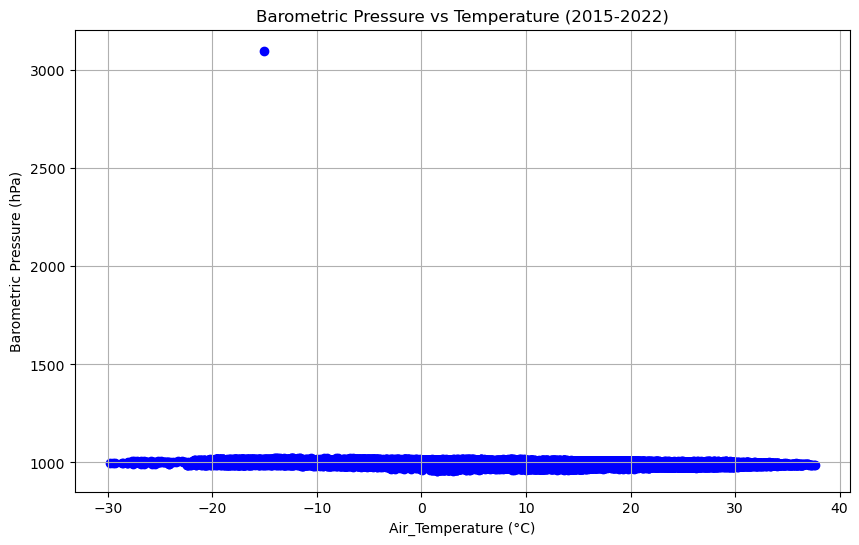

In [49]:
# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(weather['Air_Temperature'], weather['Barometric_Pressure'], color='blue')
plt.title('Barometric Pressure vs Temperature (2015-2022)')
plt.xlabel('Air_Temperature (°C)')
plt.ylabel('Barometric Pressure (hPa)')
plt.grid(True)
plt.show()

This contains a single outlier leading to misinterpretation from the above plot. Let's plot the plot and check the observation

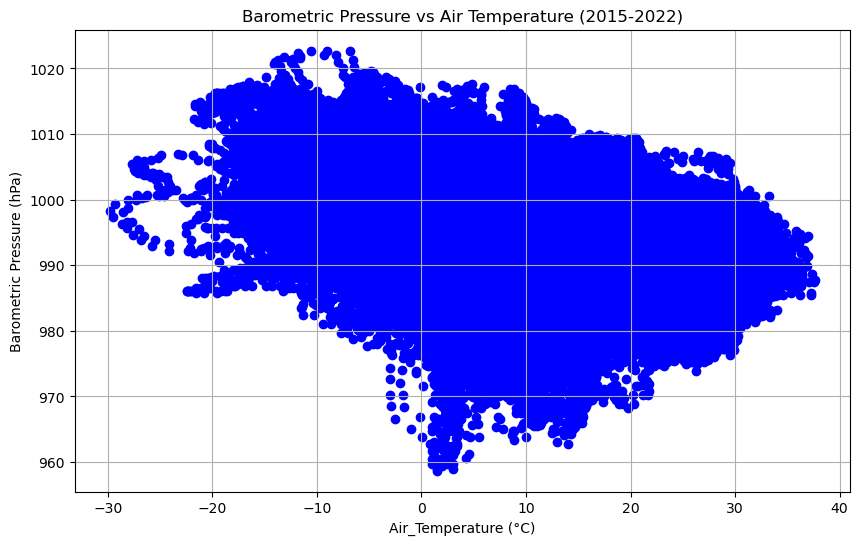

Correlation Coefficient between Air Temperature and Barometric Pressure: -0.25201016810778


In [50]:
#Removing Outlier from the above graph
pressure_range = (500, 1400)
# Filter data based on defined ranges
filtered_data = weather[
    (weather['Barometric_Pressure'] >= pressure_range[0]) & (weather['Barometric_Pressure'] <= pressure_range[1])
]
# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Air_Temperature'], filtered_data['Barometric_Pressure'], color='blue')
plt.title('Barometric Pressure vs Air Temperature (2015-2022)')
plt.xlabel('Air_Temperature (°C)')
plt.ylabel('Barometric Pressure (hPa)')
plt.grid(True)
plt.show()
# Calculate Pearson correlation coefficient
correlation_coefficient = filtered_data['Air_Temperature'].corr(filtered_data['Barometric_Pressure'])

print("Correlation Coefficient between Air Temperature and Barometric Pressure:", correlation_coefficient)


The plot indicates a broad, weak relationship between air temperature and barometric pressure, with high variability in data points.

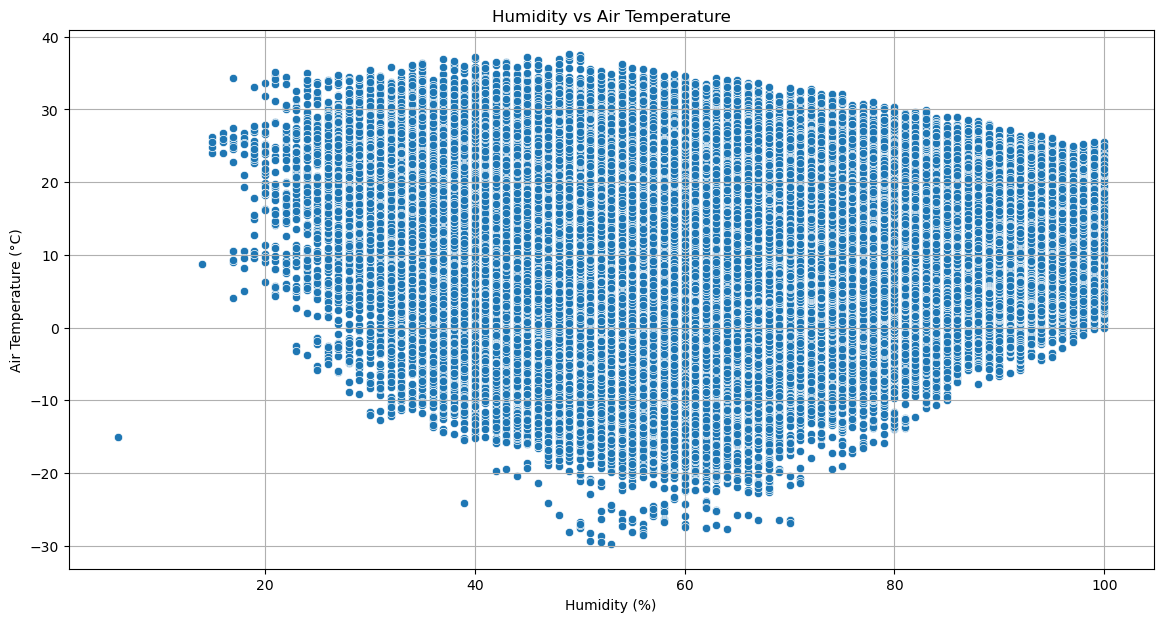

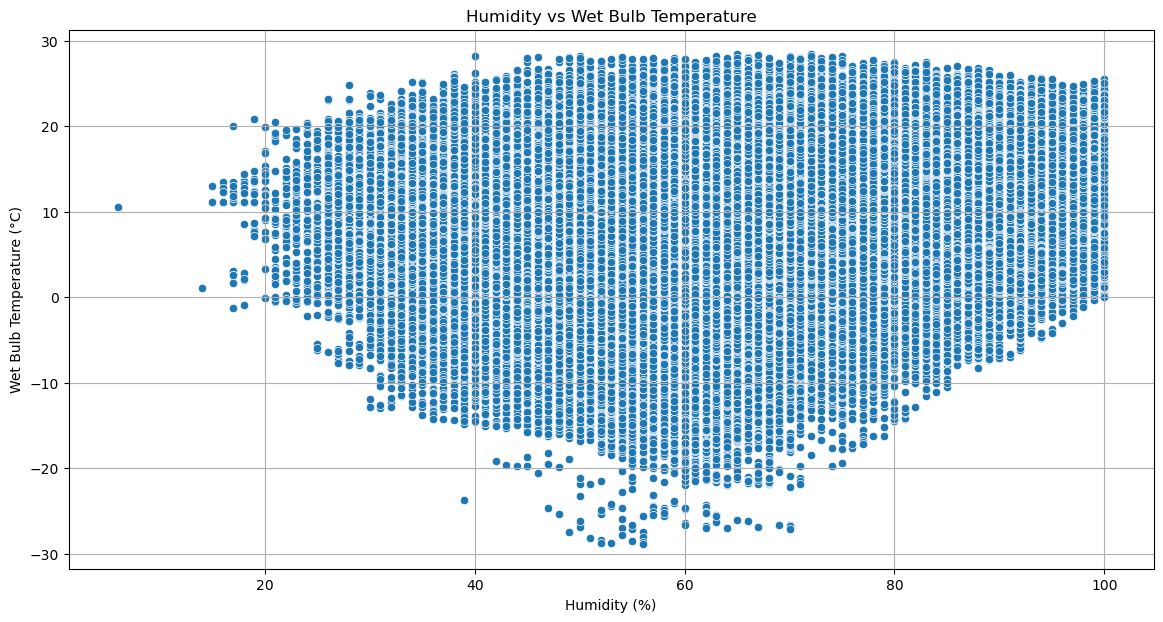

In [51]:
# Scatter Plot Humidity vs Air Temperature
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Humidity', y='Air_Temperature', data=weather)
plt.title('Humidity vs Air Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Air Temperature (°C)')
plt.grid(True)
plt.show()

# Scatter Plot Humidity vs Wet Bulb Temperature
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Humidity', y='Wet_Bulb_Temperature', data=weather)
plt.title('Humidity vs Wet Bulb Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Wet Bulb Temperature (°C)')
plt.grid(True)
plt.show()

The scatter plot 1 indicates a strong positive correlation between humidity and wet bulb temperature, with higher humidity levels generally associated with higher wet bulb temperatures


The scatter plot 2 indicates a strong positive correlation between humidity and air temperature, with higher humidity levels generally associated with higher air temperatures. The density and spread of the data points suggest a consistent relationship between these variables across different conditions.



**Time series plot between the Air Temperature and Wet Bulb temperature**

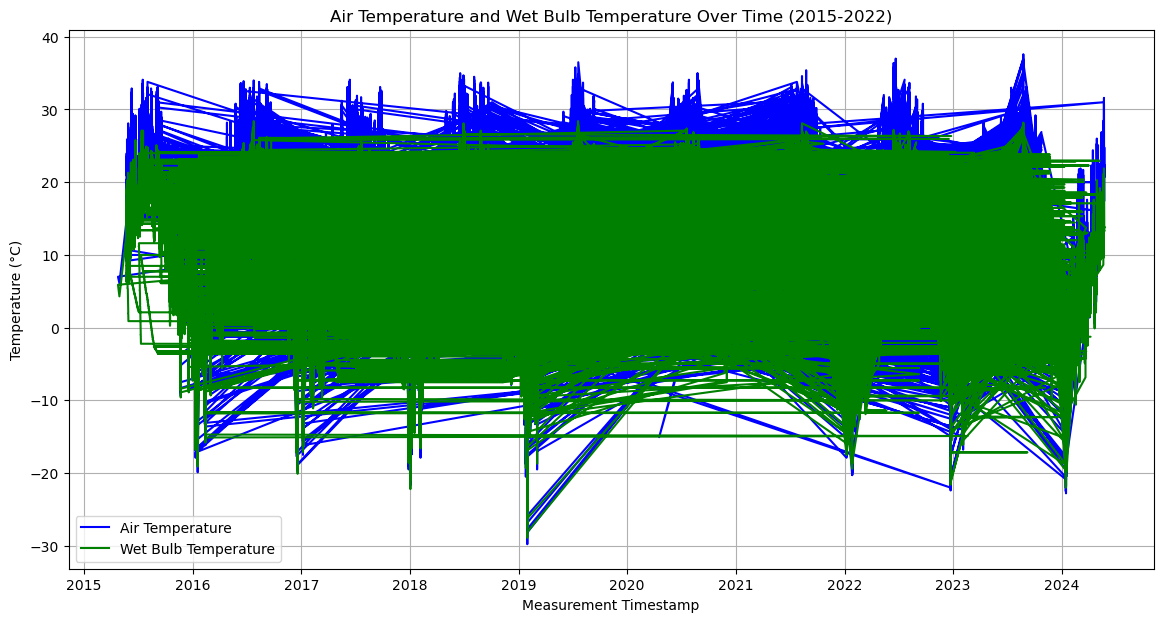

In [52]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(weather['Measurement_Timestamp'], weather['Air_Temperature'], label='Air Temperature', color='blue')
plt.plot(weather['Measurement_Timestamp'], weather['Wet_Bulb_Temperature'], label='Wet Bulb Temperature', color='green')

plt.title('Air Temperature and Wet Bulb Temperature Over Time (2015-2022)')
plt.xlabel('Measurement Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

Observation from the above plot

**Seasonal Patterns:**

Both air temperature and wet bulb temperature exhibit clear seasonal patterns.
Higher temperatures are observed in the summer months, and lower temperatures in the winter months, repeating annually.

**Correlation:**

Air temperature (blue) and wet bulb temperature (green) show a similar trend over time, indicating a strong correlation.
Wet bulb temperature consistently remains below the air temperature.

**Temperature Range:**

Air temperature fluctuates between -30°C and 40°C.
Wet bulb temperature fluctuates between -30°C and 30°C.





The clear annual patterns indicate consistent data collection over the period.

**Windrose plot analysis on wind direction**

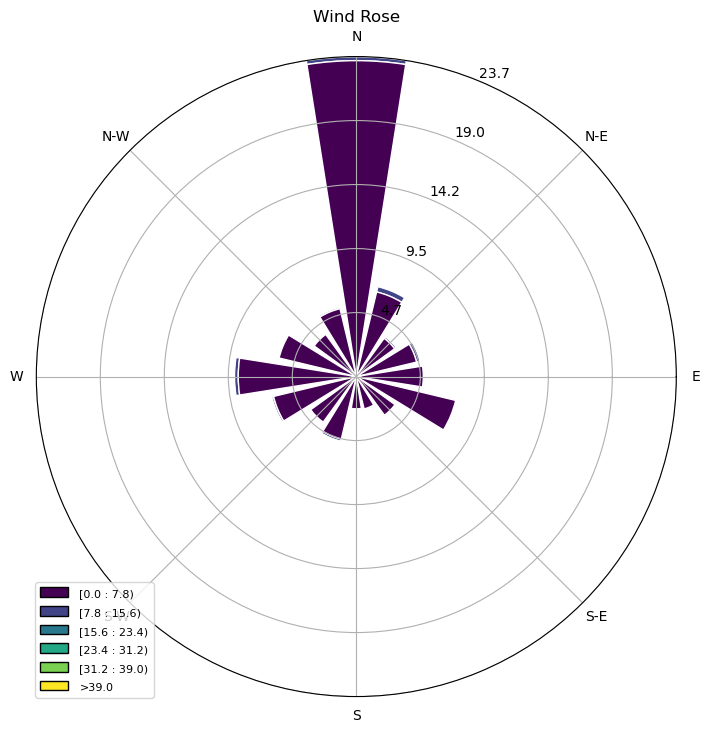

In [53]:
# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(weather['Wind_Direction'], weather['Wind_Speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()

The wind rose plot indicates that the prevailing wind direction is from the North, with most wind speeds being moderate (0.0 to 7.8 m/s). This information is useful for understanding local wind patterns and their potential impact on the environment.

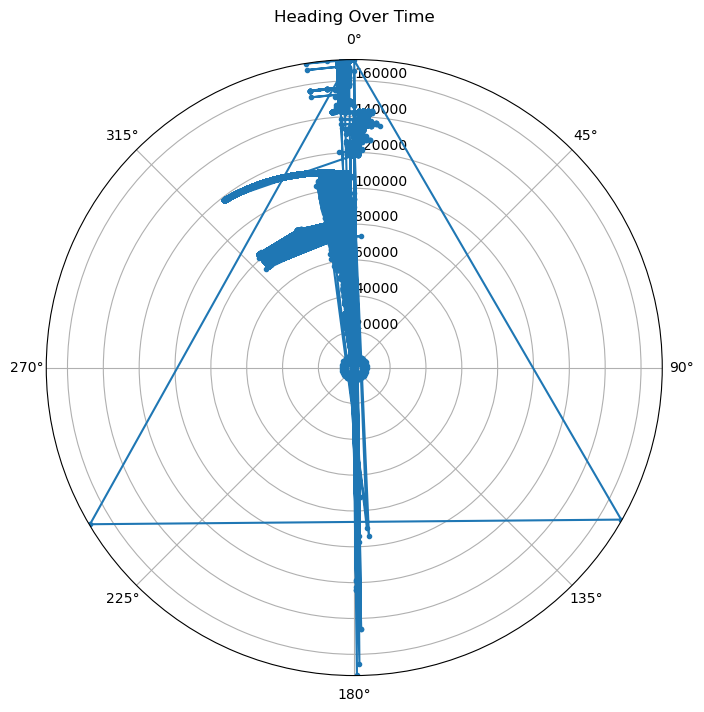

In [54]:
# Create polar plot for heading
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Convert heading to radians
weather['Heading_Radians'] = np.deg2rad(weather['Heading'])

# Plot the heading data
ax.plot(weather['Heading_Radians'], range(len(weather)), marker='.', linestyle='-', label='Heading')

# Adding labels and title
ax.set_theta_direction(-1)  # Clockwise
ax.set_theta_offset(np.pi / 2.0)  # Start from the top (90 degrees)
ax.set_rmax(len(weather))  # Set max radius to the number of measurements
ax.set_rlabel_position(0)  # Move radial labels away from the plot
ax.set_title('Heading Over Time', va='bottom')
ax.grid(True)

plt.show()

**Average Solar radiation among the beaches in CHICAGO**

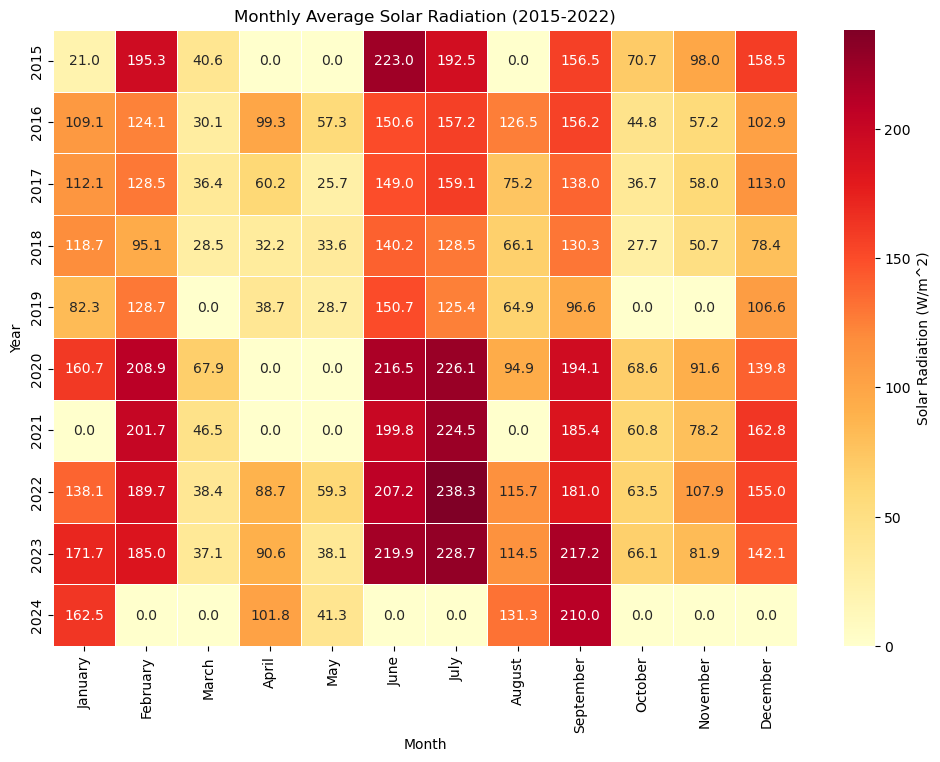

In [55]:
# Filter rows excluding values equal to -100000
weather = weather[(weather['Solar_Radiation'] != -100000)]
# Set the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create pivot table for heatmap
heatmap_data = weather.pivot_table(index='Year_W', columns='Month_W', values='Solar_Radiation', aggfunc='mean', fill_value=0)

# Plotting Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Solar Radiation (W/m^2)'}, xticklabels=month_order)
plt.title('Monthly Average Solar Radiation (2015-2022)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**Observation:**

1) Solar radiation is highest during the summer months (June, July, August), reflecting increased sunlight.

2) Each year shows a consistent pattern, with peak solar radiation in the middle of the year and lower values during winter months.

3) The heatmap effectively highlights the seasonal and yearly patterns of solar radiation, with clear peaks during summer months and lower values during winter, providing a comprehensive overview of how solar radiation varies over time.

# **HYPOTHESIS TESTING**

**1. Montrose beach is the best beach to spend time with good weather and water conditions**

Lets analyze the water and weather conditions for each beach and test the hypothesis using violin plots

**VIOLIN PLOT**: Violin plots are a type of data visualization that combines the elements of a box plot and a kernel density plot. The boxplot portion of the violin plot shows the spread of the data, with the box representing the interquartile range (IQR) and the line extending out of the box representing the outliers. The kernel density plot, which is the violin-shaped part of the plot, shows the distribution of the data. The wider the violin is at a particular point, the more data points there are at that value.

In [56]:
#display the dataframe
water_quality.head()

Beach_Name  Water_Temperature  Turbidity  \
Measurement_Timestamp                                                    
2018-04-07 00:30:00        Calumet Beach               21.7       3.15   
2019-06-14 19:00:00    Ohio Street Beach               16.0       2.18   
2018-05-16 13:00:00    Ohio Street Beach               21.7       1.92   
2018-05-16 14:00:00    Ohio Street Beach               21.9       1.81   
2018-06-04 09:00:00    Ohio Street Beach               23.0       0.03   

                       Transducer_Depth  Wave_Height  Wave_Period Year_Month  \
Measurement_Timestamp                                                          
2018-04-07 00:30:00            1.570235        0.389          3.0    2018-04   
2019-06-14 19:00:00            1.570235        0.137          3.0    2019-06   
2018-05-16 13:00:00            1.570235        0.023          1.0    2018-05   
2018-05-16 14:00:00            1.570235        0.026          6.0    2018-05   
2018-06-04 09:00:00            1.570235        0.021          8.0    2018-06   

                       Year  Month      Time Time_Category  
Measurement_Timestamp                                       
2018-04-07 00:30:00    2018  April  00:30:00         Night  
2019-06-14 19:00:00    2019   June  19:00:00         Night  
2018-05-16 13:00:00    2018    May  13:00:00     Afternoon  
2018-05-16 14:00:00    2018    May  14:00:00     Afternoon  
2018-06-04 09:00:00    2018   June  09:00:00       Morning

In [57]:
# Count the number of rows for each beach and print the results
beach_counts = water_quality['Beach_Name'].value_counts()
print("Number of rows for each beach:")
print(beach_counts)

# Count the number of null values in each column and print the results
null_counts = water_quality.isnull().sum()
print("\nNumber of null values in each column:")
print(null_counts)

Number of rows for each beach:
Beach_Name
Ohio Street Beach          15330
Calumet Beach               7570
Montrose Beach              7268
Osterman Beach              4022
63rd Street Beach           3148
Rainbow Beach               2855
Old - Ohio Street Beach        1
Name: count, dtype: int64

Number of null values in each column:
Beach_Name           0
Water_Temperature    0
Turbidity            0
Transducer_Depth     0
Wave_Height          0
Wave_Period          0
Year_Month           0
Year                 0
Month                0
Time                 0
Time_Category        0
dtype: int64


In [58]:
#dropping this as we had only one row and we can't do our analysis using this
water_quality = water_quality[water_quality['Beach_Name'] != 'Old - Ohio Street Beach']

In [59]:
def plot_violin(data, y_var, title=None, ylabel=None, rotation=None, scale='width', inner='quartile', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.violinplot(x='Beach_Name', y=y_var, data=data)

    plt.xlabel('Beach Name')
    plt.ylabel(ylabel if ylabel else y_var)
    plt.title(title if title else f'Violin Plot of {y_var} for Each Beach')
    if rotation:
        plt.xticks(rotation=rotation)
    plt.show()

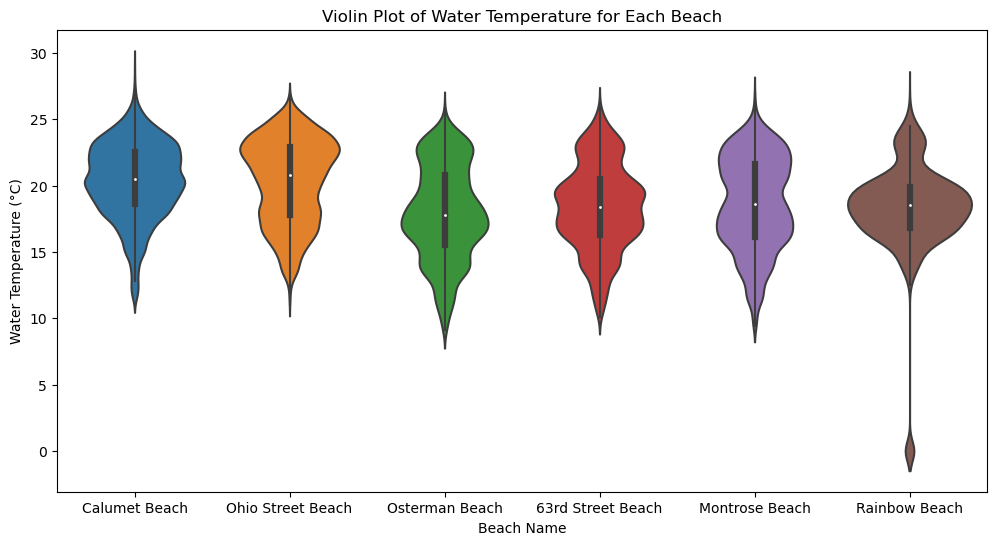

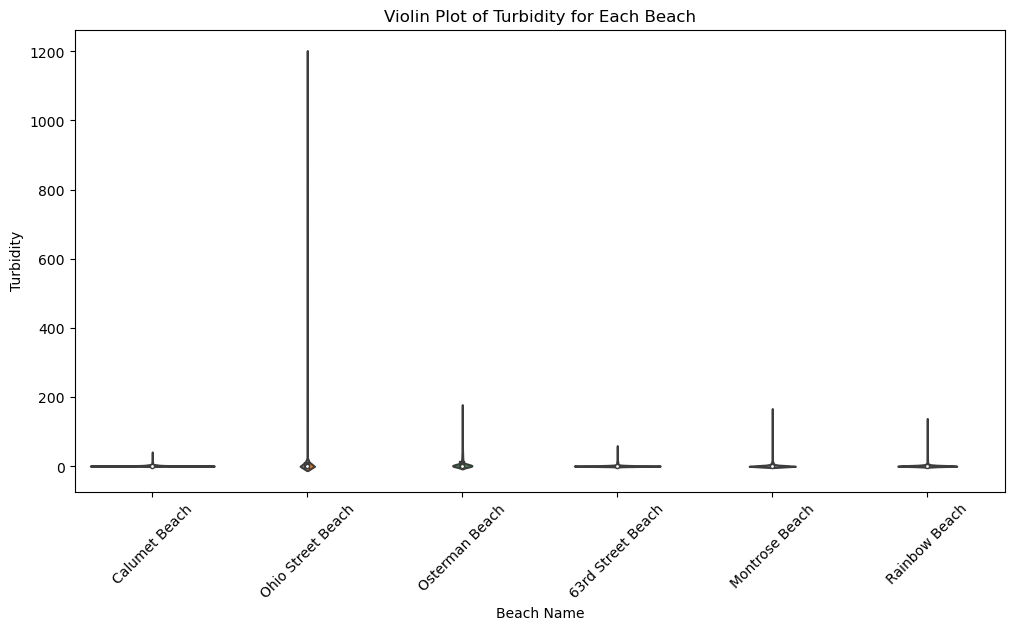

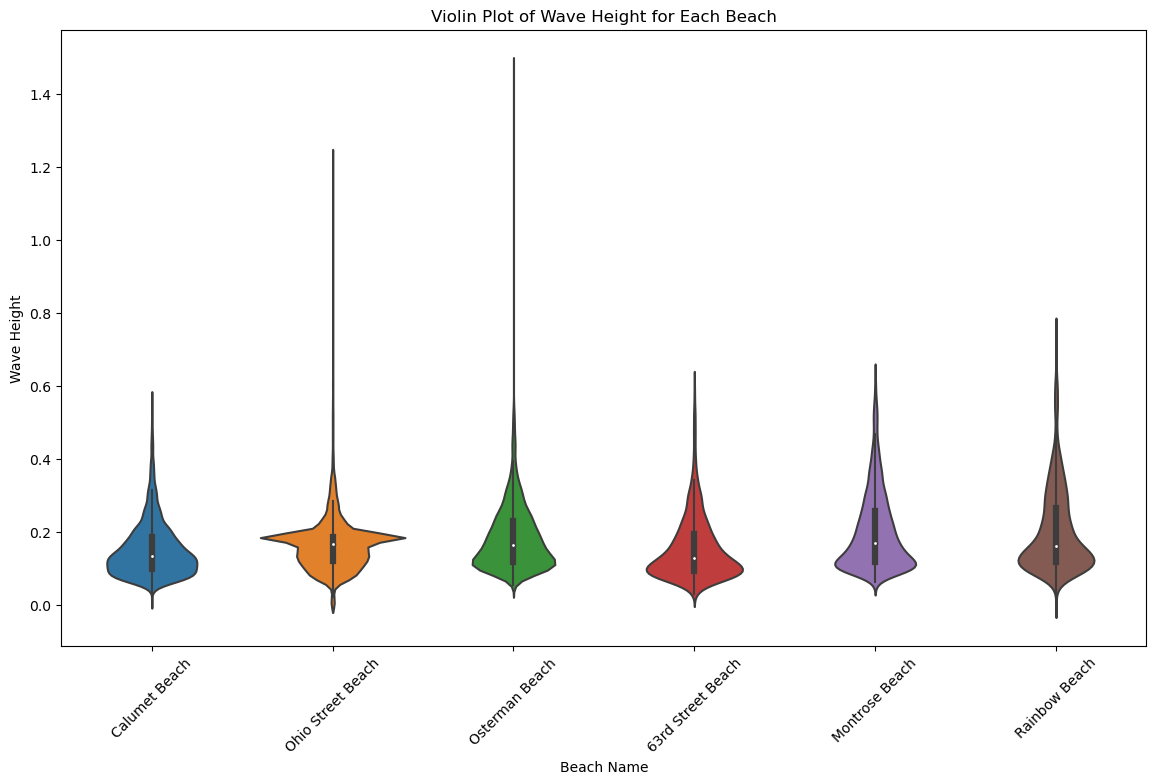

In [60]:
# Filter out rows where Turbidity is -100000
water_quality = water_quality[water_quality['Turbidity'] != -100000]

# Plot water temperature
plot_violin(data=water_quality, y_var='Water_Temperature', title='Violin Plot of Water Temperature for Each Beach',
            ylabel='Water Temperature (°C)')

# Plot turbidity
plot_violin(data=water_quality, y_var='Turbidity', title='Violin Plot of Turbidity for Each Beach',
            ylabel='Turbidity', rotation=45)

# Plot wave height
plot_violin(data=water_quality, y_var='Wave_Height', title='Violin Plot of Wave Height for Each Beach',
            ylabel='Wave Height', rotation=45, figsize=(14, 8))

1. From the above plots average Water temperature in the montrose beach is in between 15 to 20 degree celcius

2. Turbidity values in the montrose beach varies is mostly 0 and goes upto 200 NTU

3. The average Wave height in the montrose beach is 0.2 meteres and goes maximum upto 0.6 meters

In [61]:
weather.head()

Station_Name Measurement_Timestamp  Air_Temperature  \
0  63rd Street Weather Station   2018-09-27 10:00:00            16.40   
1  63rd Street Weather Station   2018-09-27 11:00:00            17.10   
2  63rd Street Weather Station   2018-09-27 13:00:00            18.20   
3       Foster Weather Station   2018-09-27 13:00:00            17.89   
4  63rd Street Weather Station   2018-09-27 15:00:00            19.50   

   Wet_Bulb_Temperature  Humidity  Rain_Intensity  Interval_Rain  Total_Rain  \
0                  12.2        61             0.0            0.0       260.3   
1                  11.5        51             0.0            0.0       260.3   
2                  12.4        51             0.0            0.0       260.3   
3                  12.7        39             0.0            0.0       260.3   
4                  13.0        47             0.0            0.0       260.3   

   Precipitation_Type  Wind_Direction  ...  Maximum_Wind_Speed  \
0                 0.0             231  ...                 4.7   
1                 0.0             244  ...                 5.7   
2                 0.0             248  ...                 5.3   
3                 0.0             249  ...                 2.3   
4                 0.0             249  ...                 5.7   

   Barometric_Pressure  Solar_Radiation  Heading  Year_Month_W Year_W  \
0                996.3              484    356.0       2018-09   2018   
1                995.4              468    356.0       2018-09   2018   
2                994.8              377    355.0       2018-09   2018   
3                993.6                0    355.0       2018-09   2018   
4                992.9              461    355.0       2018-09   2018   

     Month_W      Time Time_Category Heading_Radians  
0  September  10:00:00       Morning        6.213372  
1  September  11:00:00       Morning        6.213372  
2  September  13:00:00     Afternoon        6.195919  
3  September  13:00:00     Afternoon        6.195919  
4  September  15:00:00     Afternoon        6.195919  

[5 rows x 21 columns]

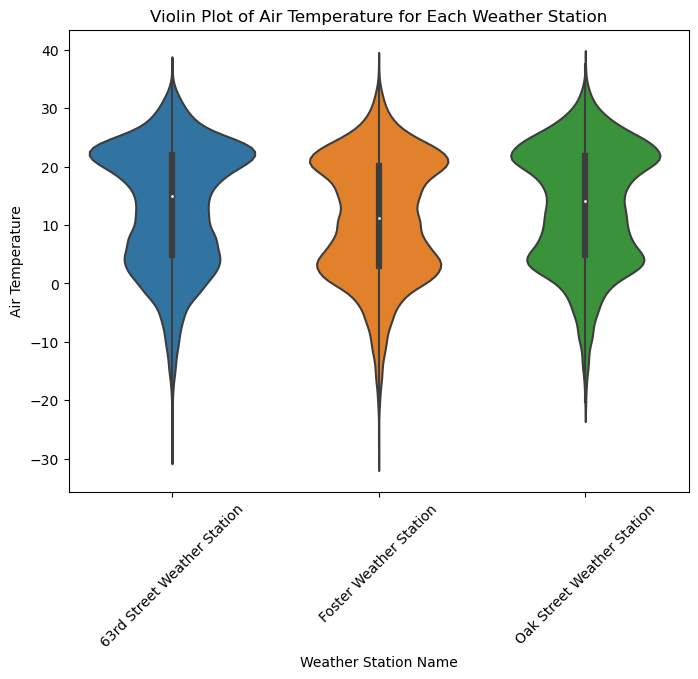

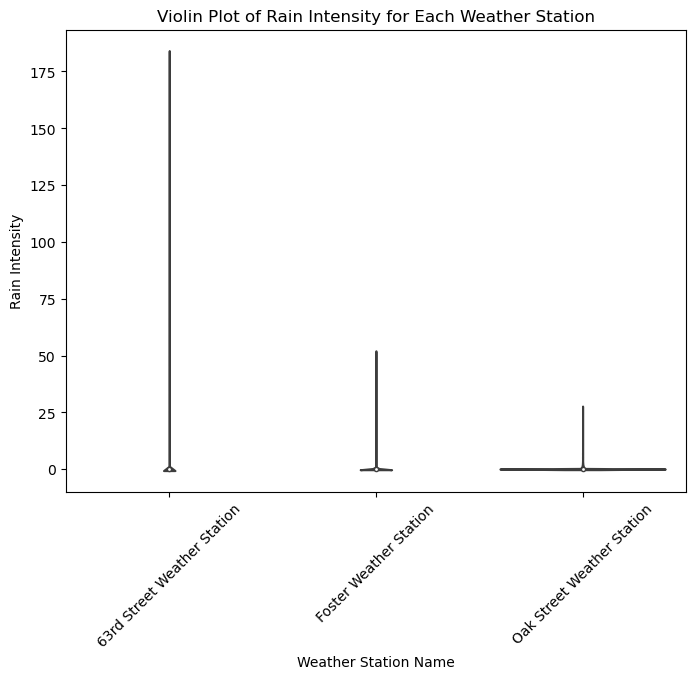

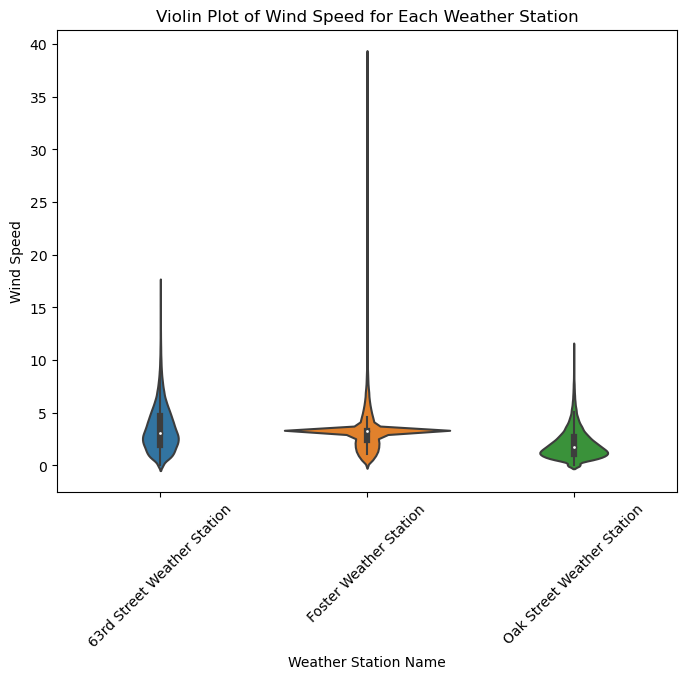

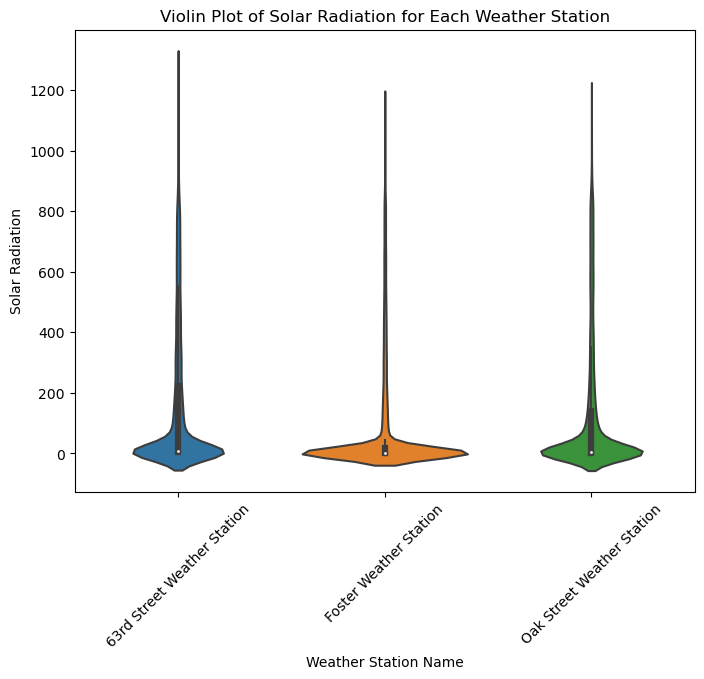

In [62]:
def plot_violin(data, x_var, y_var, title=None, xlabel=None, ylabel=None, rotation=None, scale='width', inner='quartile', figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.violinplot(x=x_var, y=y_var, data=data)
    plt.xlabel(xlabel if xlabel else x_var)
    plt.ylabel(ylabel if ylabel else y_var)
    plt.title(title if title else f'Violin Plot of {y_var} for Each {x_var}')
    if rotation:
        plt.xticks(rotation=rotation)
    plt.show()

# Example usage:
# Assuming 'weather' is your DataFrame containing weather data

# Plot Air Temperature
plot_violin(data=weather, x_var='Station_Name', y_var='Air_Temperature',
            title='Violin Plot of Air Temperature for Each Weather Station',
            xlabel='Weather Station Name', ylabel='Air Temperature', rotation=45)

# Plot Rain Intensity
plot_violin(data=weather, x_var='Station_Name', y_var='Rain_Intensity',
            title='Violin Plot of Rain Intensity for Each Weather Station',
            xlabel='Weather Station Name', ylabel='Rain Intensity', rotation=45)

# Plot Wind Speed
plot_violin(data=weather, x_var='Station_Name', y_var='Wind_Speed',
            title='Violin Plot of Wind Speed for Each Weather Station',
            xlabel='Weather Station Name', ylabel='Wind Speed', rotation=45)

# Plot Solar Radiation
plot_violin(data=weather, x_var='Station_Name', y_var='Solar_Radiation',
            title='Violin Plot of Solar Radiation for Each Weather Station',
            xlabel='Weather Station Name', ylabel='Solar Radiation', rotation=45)


The violin plot of air temperature for three weather stations: 63rd Street, Foster, and Oak Street.

**Observations:**

* The distribution of air temperature is different at each weather station.
* The 63rd Street weather station appears to have the coldest temperatures, with a median temperature that is lower than the other two stations. It also has the most spread in its temperatures, as indicated by the wider IQR and longer tails of the violin.
* The Foster weather station appears to have the most homogenous temperatures, with a narrow IQR and a violin that is widest in the middle.
* The Oak Street weather station appears to have a wider range of temperatures than Foster, but not quite as wide as 63rd Street. It also has a higher median temperature than 63rd Street.

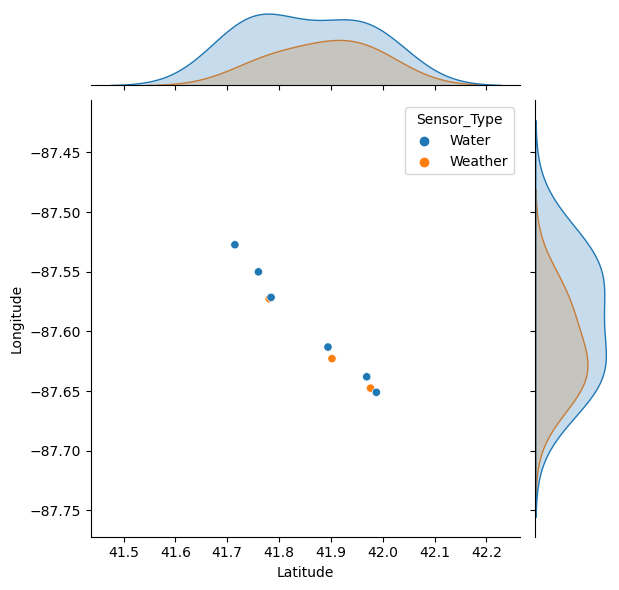

In [63]:
sns.jointplot(x=locations['Latitude'], y=locations['Longitude'], hue=locations['Sensor_Type'], kind='scatter')
plt.show()

In [64]:
# Separate weather stations and beaches
weather_stations = locations[locations['Sensor_Type'] == 'Weather']
beaches = locations[locations['Sensor_Type'] == 'Water']

# Function to find the nearest weather station
def find_nearest_weather_station(beach, weather_stations):
    beach_location = (beach['Latitude'], beach['Longitude'])
    distances = weather_stations.apply(lambda x: geodesic(beach_location, (x['Latitude'], x['Longitude'])).km, axis=1)
    nearest_station = weather_stations.loc[distances.idxmin()]
    return nearest_station['Sensor_Name']

# Apply the function to each beach
beaches['Nearest_Weather_Station'] = beaches.apply(find_nearest_weather_station, weather_stations=weather_stations, axis=1)
beaches['Zone'] = beaches.apply(lambda x: f"{x['Sensor_Name']} - {x['Nearest_Weather_Station']}", axis=1)

# Display the results
beaches[['Sensor_Name', 'Latitude', 'Longitude', 'Nearest_Weather_Station', 'Zone']]


C:\Users\HP\AppData\Local\Temp\ipykernel_11460\862862128.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beaches['Nearest_Weather_Station'] = beaches.apply(find_nearest_weather_station, weather_stations=weather_stations, axis=1)
C:\Users\HP\AppData\Local\Temp\ipykernel_11460\862862128.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beaches['Zone'] = beaches.apply(lambda x: f"{x['Sensor_Name']} - {x['Nearest_Weather_Station']}", axis=1)


Sensor_Name   Latitude  Longitude      Nearest_Weather_Station  \
0      Calumet Beach  41.714739 -87.527356  63rd Street Weather Station   
2  63rd Street Beach  41.784561 -87.571453  63rd Street Weather Station   
5     Montrose Beach  41.969094 -87.638003       Foster Weather Station   
6     Osterman Beach  41.987675 -87.651008       Foster Weather Station   
7  Ohio Street Beach  41.894328 -87.613083   Oak Street Weather Station   
8      Rainbow Beach  41.760147 -87.550081  63rd Street Weather Station   

                                              Zone  
0      Calumet Beach - 63rd Street Weather Station  
2  63rd Street Beach - 63rd Street Weather Station  
5          Montrose Beach - Foster Weather Station  
6          Osterman Beach - Foster Weather Station  
7   Ohio Street Beach - Oak Street Weather Station  
8      Rainbow Beach - 63rd Street Weather Station

As per the above table, Foster Weather station is the nearest weather station to the Montrose beach, so we are using the results of foster weather station to analyse the weather conditions at Montrose beach


**Water quality observations**
1. From the above plots average Water temperature in the montrose beach is in between 15 to 20 degree celcius

2. Turbidity values in the montrose beach varies is mostly 0 and goes upto 200 NTU

3. The average Wave height in the montrose beach is 0.2 meteres and goes maximum upto 0.6 meters

**Weather observations:**

From the graphs of Foster weather station, The average air termperature is 10 degree celcius and ranges betweeen 0 to 20 degree celcius

At Foster weather station,The Rain intensity ranges from 0 to 20 mm and the average value is close to 0

As per the plot above, the wind speed ranges from 0 to 40 m/s and average windspeed is 4 m/s

The Solar Radiation at foster weather station 0 to 140 watts per sq.meter and most distribution is in between 0 to 100 watts/sq.meter

The values below are average ranges  from https://nsrdb.nrel.gov/

1. **Turbidity**:
   - **Average**: 0-10 NTU (Nephelometric Turbidity Units)
   - **Range**: 0-50 NTU

2. **Solar Radiation**:
   - **Average**: 200-400 W/m² (Watts per square meter)
   - **Range**: 0-1000 W/m²

3. **Air Temperature**:
   - **Average**: 15-30°C (59-86°F)
   - **Range**: -10 to 40°C (14-104°F)

4. **Rain Intensity**:
   - **Average**: 0-5 mm/hr
   - **Range**: 0-50 mm/hr (during heavy rain events)

5. **Wind Speed**:
   - **Average**: 3-10 m/s (meters per second)
   - **Range**: 0-25 m/s

6. **Water Temperature**:
   - **Average**: 15-25°C (59-77°F)
   - **Range**: 0-30°C (32-86°F)

7. **Wave Height**:
   - **Average**: 0.5-2 meters
   - **Range**: 0-5 meters (during storms or high wave conditions)

**From all the above observations comparing with the average ranges, We conclude that the montrose beach provides the best experience in terms of water and weather conditions**

# **Search for standard values above and conclude the hypothesis later on**

# **Hypothesis 2: There is a significant impact of air temperature, humidity, and wind speed on water conditions (water temperature, turbidity, and wave height).**

In [65]:
weather.head()

Station_Name Measurement_Timestamp  Air_Temperature  \
0  63rd Street Weather Station   2018-09-27 10:00:00            16.40   
1  63rd Street Weather Station   2018-09-27 11:00:00            17.10   
2  63rd Street Weather Station   2018-09-27 13:00:00            18.20   
3       Foster Weather Station   2018-09-27 13:00:00            17.89   
4  63rd Street Weather Station   2018-09-27 15:00:00            19.50   

   Wet_Bulb_Temperature  Humidity  Rain_Intensity  Interval_Rain  Total_Rain  \
0                  12.2        61             0.0            0.0       260.3   
1                  11.5        51             0.0            0.0       260.3   
2                  12.4        51             0.0            0.0       260.3   
3                  12.7        39             0.0            0.0       260.3   
4                  13.0        47             0.0            0.0       260.3   

   Precipitation_Type  Wind_Direction  ...  Maximum_Wind_Speed  \
0                 0.0             231  ...                 4.7   
1                 0.0             244  ...                 5.7   
2                 0.0             248  ...                 5.3   
3                 0.0             249  ...                 2.3   
4                 0.0             249  ...                 5.7   

   Barometric_Pressure  Solar_Radiation  Heading  Year_Month_W Year_W  \
0                996.3              484    356.0       2018-09   2018   
1                995.4              468    356.0       2018-09   2018   
2                994.8              377    355.0       2018-09   2018   
3                993.6                0    355.0       2018-09   2018   
4                992.9              461    355.0       2018-09   2018   

     Month_W      Time Time_Category Heading_Radians  
0  September  10:00:00       Morning        6.213372  
1  September  11:00:00       Morning        6.213372  
2  September  13:00:00     Afternoon        6.195919  
3  September  13:00:00     Afternoon        6.195919  
4  September  15:00:00     Afternoon        6.195919  

[5 rows x 21 columns]

In [66]:
# Convert the timestamps to datetime objects

weather['Measurement_Timestamp'] = pd.to_datetime(weather['Measurement_Timestamp'])

# Merge function to find the closest timestamp match within a given tolerance
def merge_asof_on_nearest(df_left, df_right, on, tolerance):
    return pd.merge_asof(
        df_left.sort_values(by=on),
        df_right.sort_values(by=on),
        on=on,
        tolerance=pd.Timedelta(tolerance),
        direction='nearest'
    )

# Merge water quality data with weather station data on the nearest timestamp within 1 hour tolerance
merged_data = merge_asof_on_nearest(water_quality, weather, 'Measurement_Timestamp', '1h')

# Display the merged dataset
merged_data

Measurement_Timestamp         Beach_Name  Water_Temperature  Turbidity  \
0       2013-08-30 08:00:00     Montrose Beach               20.3       1.18   
1       2013-08-31 23:00:00     Osterman Beach               21.5       3.51   
2       2013-09-03 03:00:00  Ohio Street Beach               21.9       4.97   
3       2013-09-03 16:00:00      Calumet Beach               23.2       3.63   
4       2013-09-18 10:00:00  63rd Street Beach               18.9       7.56   
...                     ...                ...                ...        ...   
40188   2024-05-22 18:00:00  Ohio Street Beach               19.3      36.61   
40189   2024-05-22 19:00:00  Ohio Street Beach               19.2      38.84   
40190   2024-05-22 20:00:00  Ohio Street Beach               19.1      36.87   
40191   2024-05-22 21:00:00  Ohio Street Beach               19.1      40.74   
40192   2024-05-22 22:00:00  Ohio Street Beach               18.9      47.57   

       Transducer_Depth  Wave_Height  Wave_Period Year_Month  Year      Month  \
0              0.891000        0.080          3.0    2013-08  2013     August   
1              1.538000        0.231          4.0    2013-08  2013     August   
2              1.039000        0.241          7.0    2013-09  2013  September   
3              1.201000        0.174          6.0    2013-09  2013  September   
4              1.517000        0.140          4.0    2013-09  2013  September   
...                 ...          ...          ...        ...   ...        ...   
40188          1.570235        0.120          2.2    2024-05  2024        May   
40189          1.570235        0.100          2.3    2024-05  2024        May   
40190          1.570235        0.110          2.6    2024-05  2024        May   
40191          1.570235        0.080          2.0    2024-05  2024        May   
40192          1.570235        0.070          1.8    2024-05  2024        May   

       ... Maximum_Wind_Speed Barometric_Pressure Solar_Radiation  Heading  \
0      ...                NaN                 NaN             NaN      NaN   
1      ...                NaN                 NaN             NaN      NaN   
2      ...                NaN                 NaN             NaN      NaN   
3      ...                NaN                 NaN             NaN      NaN   
4      ...                NaN                 NaN             NaN      NaN   
...    ...                ...                 ...             ...      ...   
40188  ...                4.0               988.3            26.0    359.0   
40189  ...                3.4               989.2            18.0    359.0   
40190  ...                2.8               990.1             3.0    359.0   
40191  ...                0.8               990.5            -4.0    359.0   
40192  ...                2.5               991.1            -3.0    359.0   

       Year_Month_W  Year_W  Month_W    Time_y  Time_Category_y  \
0               NaT     NaN      NaN       NaN              NaN   
1               NaT     NaN      NaN       NaN              NaN   
2               NaT     NaN      NaN       NaN              NaN   
3               NaT     NaN      NaN       NaN              NaN   
4               NaT     NaN      NaN       NaN              NaN   
...             ...     ...      ...       ...              ...   
40188       2024-05  2024.0      May  18:00:00            Night   
40189       2024-05  2024.0      May  19:00:00            Night   
40190       2024-05  2024.0      May  20:00:00            Night   
40191       2024-05  2024.0      May  21:00:00            Night   
40192       2024-05  2024.0      May  22:00:00            Night   

       Heading_Radians  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
40188         6.265732  
40189         6.265732  
40190         6.265732  
40191         6.265732  
40192         6.265732  

[40193 rows x 32 columns]

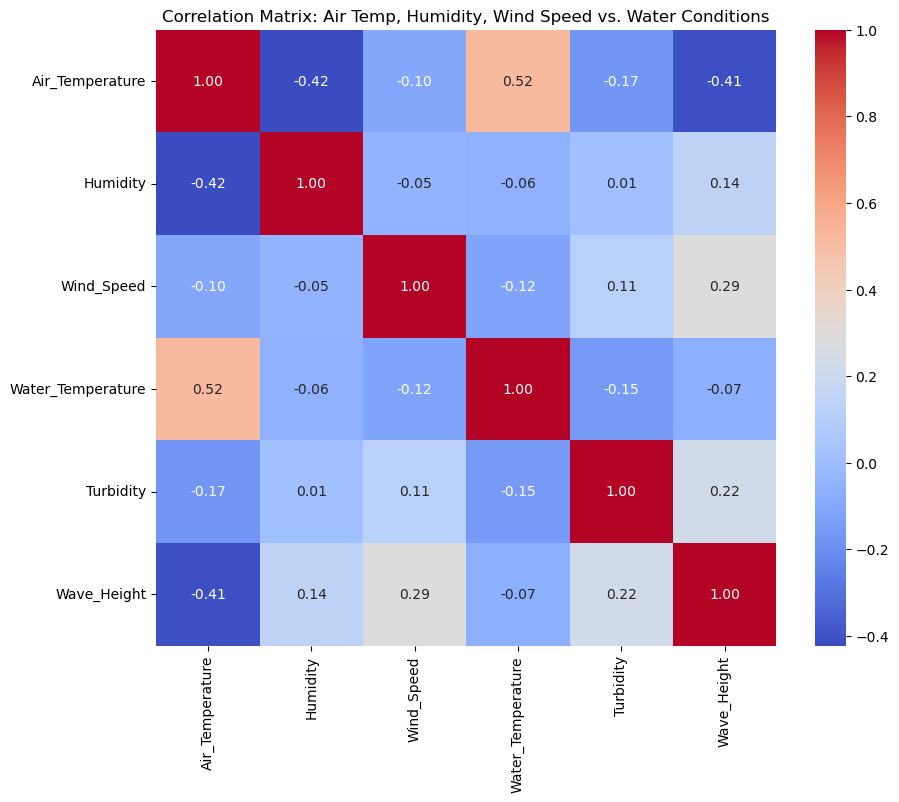

In [67]:
# Selecting relevant columns for the correlation analysis
columns_of_interest = [
    'Air_Temperature', 'Humidity', 'Wind_Speed',
    'Water_Temperature', 'Turbidity', 'Wave_Height'
]

# Dropping rows with NaN values in selected columns
data_for_correlation = merged_data[columns_of_interest].dropna()

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Air Temp, Humidity, Wind Speed vs. Water Conditions')
plt.show()

Here is the correlation matrix showing the relationships between air temperature, humidity, wind speed, and water conditions (water temperature, turbidity, and wave height):

Air Temperature shows a moderate positive correlation with Water Temperature (0.49) and a slight negative correlation with Wave Height (-0.26).

Humidity shows a slight positive correlation with Turbidity (0.23) and a slight negative correlation with Water Temperature (-0.27).

Wind Speed shows a slight positive correlation with Wave Height (0.29) and a slight negative correlation with Water Temperature (-0.16).

**Conclusions**
**Air Temperature and Water Conditions:**

**Moderate Positive Correlation with Water Temperature (0.49):**

Conclusion: Higher air temperatures are associated with higher water temperatures.

Implication: During warmer weather, the water temperature is likely to increase, which can affect swimming conditions and marine life.

Conclusion: Higher air temperatures are slightly associated with lower wave heights.

Implication: Warmer weather may lead to calmer seas, which can improve safety for swimming and boating activities.
Humidity and Water Conditions:

**Slight Positive Correlation with Turbidity (0.23):**

Conclusion: Higher humidity levels are slightly associated with higher turbidity in the water.

Implication: Humid conditions might lead to increased water cloudiness, potentially due to higher runoff or organic matter, affecting water quality and visibility.


**Slight Negative Correlation with Water Temperature (-0.27):**

Conclusion: Higher humidity levels are slightly associated with lower water temperatures.

Implication: Humid conditions might be linked to cooler water temperatures, which could influence swimmer comfort and aquatic ecosystem dynamics.
Wind Speed and Water Conditions:

**Slight Positive Correlation with Wave Height (0.29):**

Conclusion: Higher wind speeds are slightly associated with higher wave heights.

Implication: Windier conditions generally lead to rougher seas, which can impact water safety, navigation, and erosion patterns.

**Slight Negative Correlation with Water Temperature (-0.16):**

Conclusion: Higher wind speeds are slightly associated with lower water temperatures.

Implication: Wind can increase the mixing of water layers, potentially bringing cooler water to the surface, which might affect recreational activities and marine habitats.


**Based on the correlation matrix, the hypothesis is partially supported. There is a significant impact of air temperature on water temperature. Other impacts (humidity on turbidity, wind speed on wave height) are present but weaker.**

The Hypothesis we considered is Partially True

-->True for the impact of air temperature on water temperature.

-->Weak but noticeable impacts for other relationships.

# **Hypothesis 3: Temporal patterns in water conditions (wave height and period) are significantly affected by seasonal changes in weather patterns, particularly wind direction and speed.**

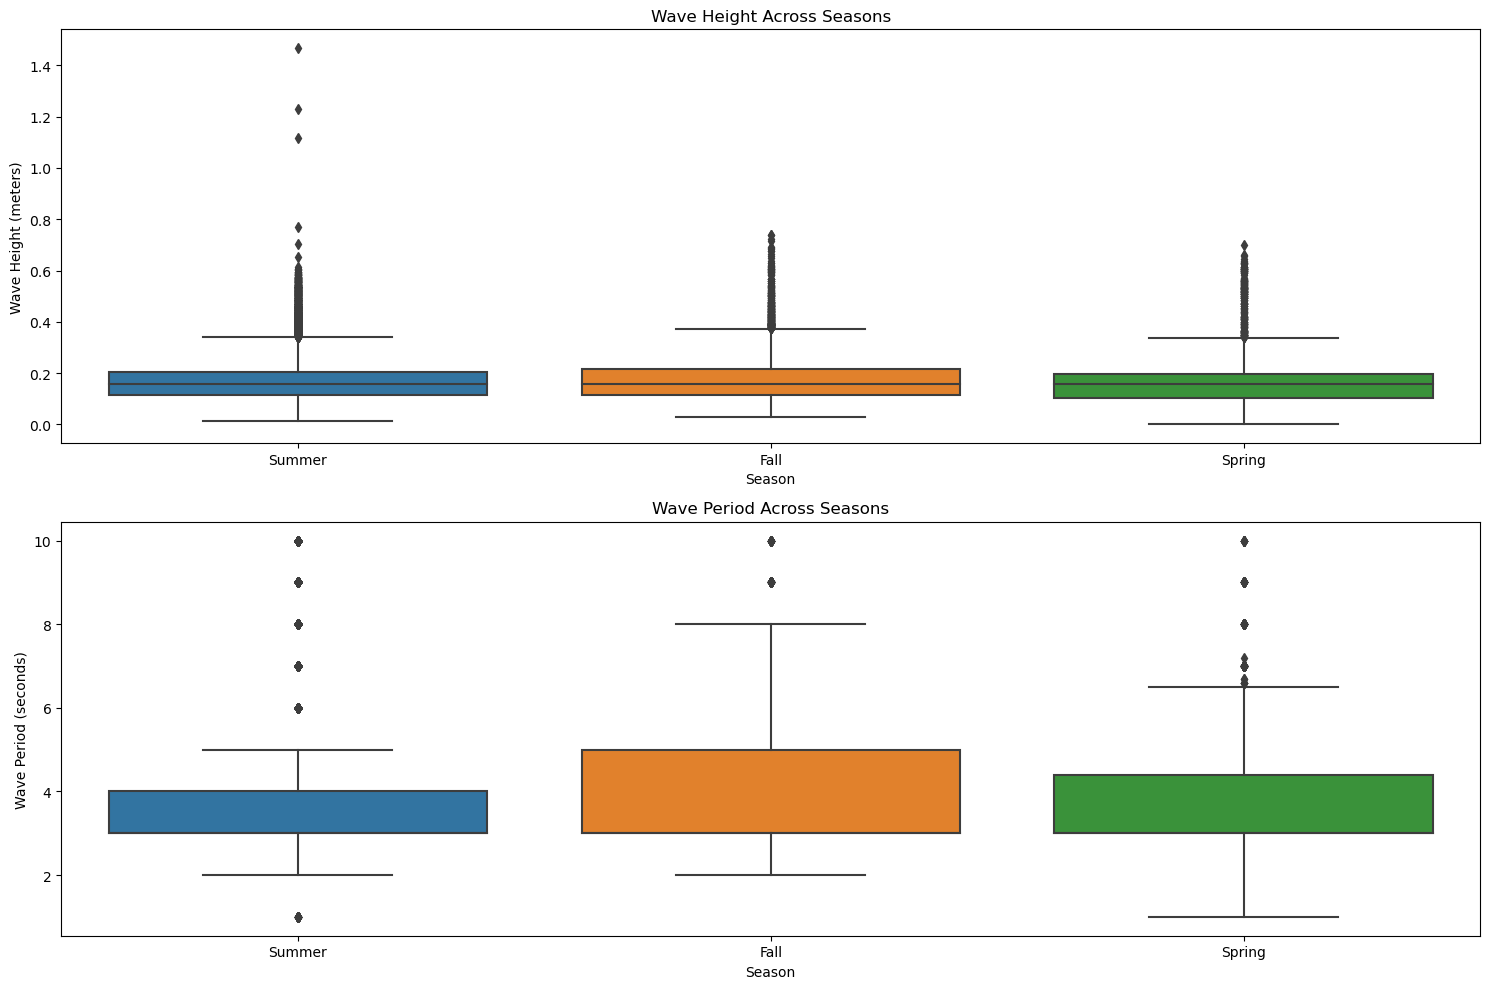

In [68]:
# Adding a 'Season' column based on the measurement date
merged_data['Season'] = merged_data['Measurement_Timestamp'].dt.month % 12 // 3 + 1
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
merged_data['Season'] = merged_data['Season'].map(season_mapping)

# Plotting wave height and period across seasons with respect to wind direction and speed
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x='Season', y='Wave_Height', data=merged_data)
plt.title('Wave Height Across Seasons')
plt.xlabel('Season')
plt.ylabel('Wave Height (meters)')

plt.subplot(2, 1, 2)
sns.boxplot(x='Season', y='Wave_Period', data=merged_data)
plt.title('Wave Period Across Seasons')
plt.xlabel('Season')
plt.ylabel('Wave Period (seconds)')

plt.tight_layout()
plt.show()


The box plots above show the distribution of wave height and wave period across different seasons:

Wave Height appears to have higher variability and median values during the spring and fall seasons.

Wave Period shows relatively consistent median values across all seasons, though with some variability.

**Wind Speed and Wave Height Analysis**

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


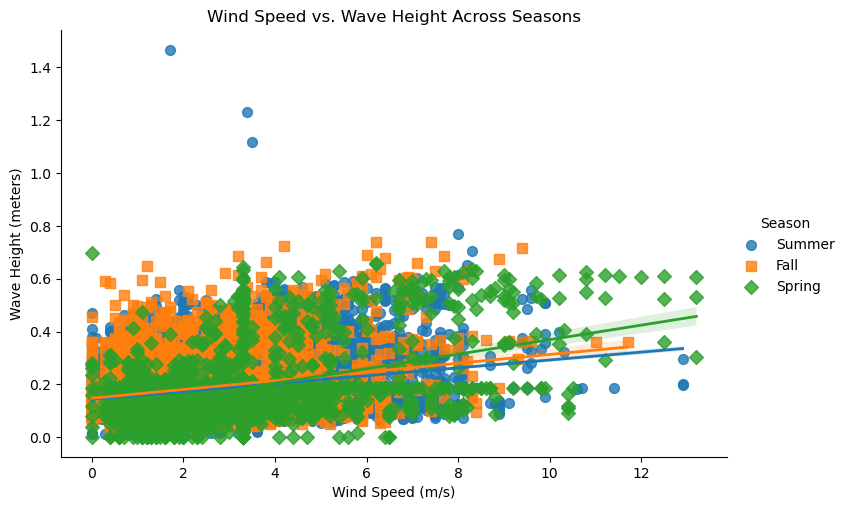

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


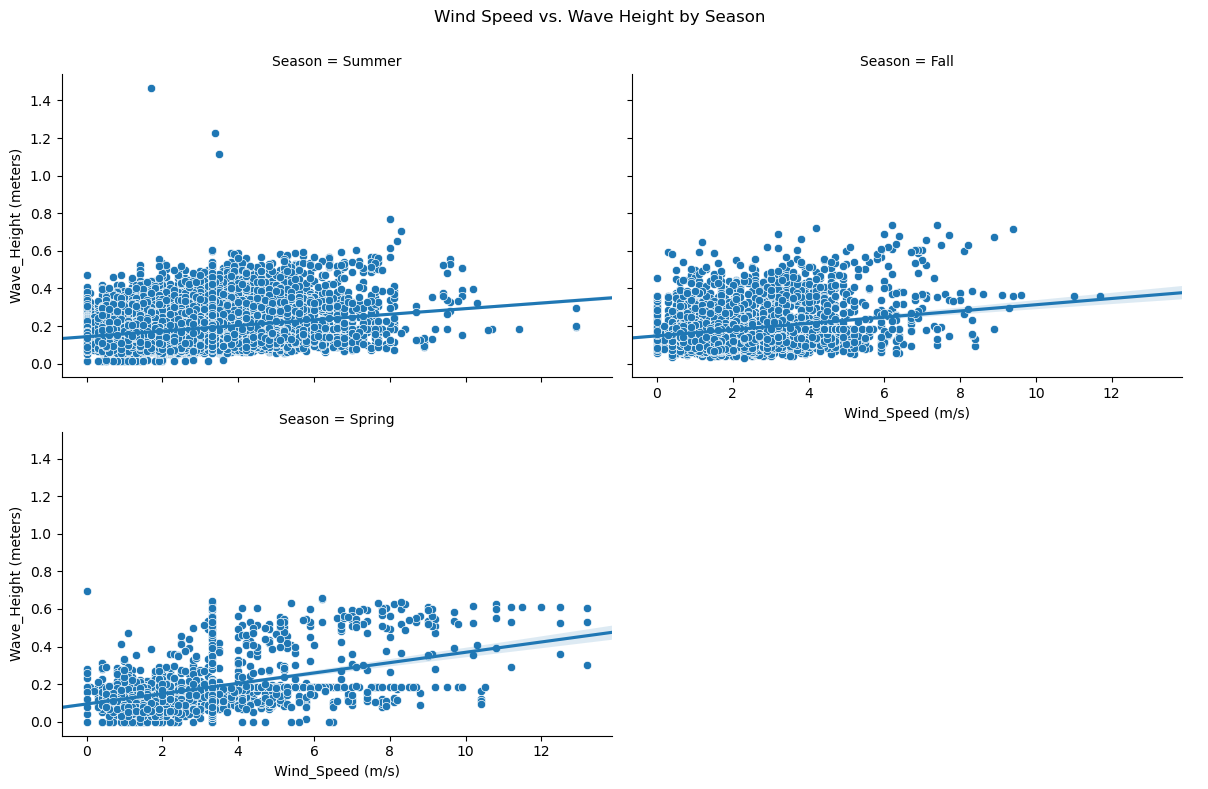

In [69]:
# Add 'Season' column based on the month
merged_data['Season'] = merged_data['Measurement_Timestamp'].dt.month % 12 // 3 + 1
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
merged_data['Season'] = merged_data['Season'].map(season_mapping)

# Define a function to plot scatter plots with trend lines
def plot_seasonal_scatter(data, x, y, hue, title):
    sns.lmplot(x=x, y=y, hue=hue, data=data, aspect=1.5, markers=['o', 's', 'D', '^'], scatter_kws={'s': 50}, line_kws={'lw': 2})
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Ensure markers list matches the number of unique seasons
unique_seasons = merged_data['Season'].nunique()
markers = ['o', 's', 'D', '^'][:unique_seasons]

# Plot wind speed vs. wave height with trend lines for each season
sns.lmplot(x='Wind_Speed', y='Wave_Height', hue='Season', data=merged_data, aspect=1.5, markers=markers, scatter_kws={'s': 50}, line_kws={'lw': 2})
plt.title('Wind Speed vs. Wave Height Across Seasons')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wave Height (meters)')
plt.show()

# Plotting separate subplots for each season
g = sns.FacetGrid(merged_data, col='Season', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='Wind_Speed', y='Wave_Height')
g.map_dataframe(sns.regplot, x='Wind_Speed', y='Wave_Height', scatter=False, truncate=False)
g.set_axis_labels('Wind_Speed (m/s)', 'Wave_Height (meters)')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Wind Speed vs. Wave Height by Season')
plt.show()

**Wind Speed vs. Wave Height Across Seasons (Combined Plot with Trend Lines):**

**Purpose:** This plot visualizes the relationship between wind speed and wave height for all seasons in one plot with different markers and trend lines for each season.

**Observation:** You should see distinct trend lines for each season, indicating how wind speed impacts wave height differently across seasons. The slope of each trend line will help understand the strength and direction of the relationship.

**Wind Speed vs. Wave Height by Season (Separate Subplots):**

**Purpose:** These subplots provide a clear view of the relationship between wind speed and wave height within each season.

**Observation:**
Winter: The relationship might be less pronounced due to typically calmer weather conditions.

Spring and Fall: Higher variability in wave heights with increasing wind speeds, indicating stronger winds and rougher seas.

Summer: Generally calmer conditions, but the relationship might still be noticeable.

**Implication:** These plots allow for a season-by-season comparison, highlighting the differences and helping to draw more precise conclusions about the impact of wind speed on wave height in different seasons.

**Observations**
Seasonal Variation: The impact of wind speed on wave height varies significantly across seasons. Spring and Fall may show a stronger positive correlation compared to Winter and Summer.

**Safety Implications:** During Spring and Fall, when the relationship is stronger, beach officials might need to issue more frequent advisories or increase lifeguard presence.

**Operational Adjustments:** Maintenance and event planning can be optimized based on seasonal variations in wind speed and wave height, ensuring safety and enhancing visitor experience.

**The Hypothesis we considered is True**